# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель:** выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости. В распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Описание данных:
- **total_images** — число фотографий квартиры в объявлении
- **last_price** — цена на момент снятия с публикации (тыс. руб.)
- **total_area** — общая площадь квартиры в квадратных метрах (м²)
- **first_day_exposition** — дата публикации
- **rooms** — число комнат
- **ceiling_height** — высота потолков (м)
- **floors_total** — всего этажей в доме
- **living_area** — жилая площадь в квадратных метрах (м²)
- **floor** — этаж
- **is_apartment** — апартаменты (булев тип)
- **studio** — квартира-студия (булев тип)
- **open_plan** — свободная планировка (булев тип)
- **kitchen_area** — площадь кухни в квадратных метрах (м²)
- **balcony** — число балконов
- **locality_name** — название населённого пункта
- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
- **city_centers_nearest** — расстояние до центра города (км)
- **parks_around3000** — число парков в радиусе 3 км
- **parks_nearest** — расстояние до ближайшего парка (м)
- **ponds_around3000** — число водоёмов в радиусе 3 км
- **ponds_nearest** — расстояние до ближайшего водоёма (м)
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime as dt
import numpy as np

In [2]:
pth1 = '/datasets/real_estate_data.csv'
pth2 = 'https://code.s3.yandex.net/datasets/real_estate_data.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1, sep='\t')
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, sep='\t')
else:
    print('Something is wrong')

In [3]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [4]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

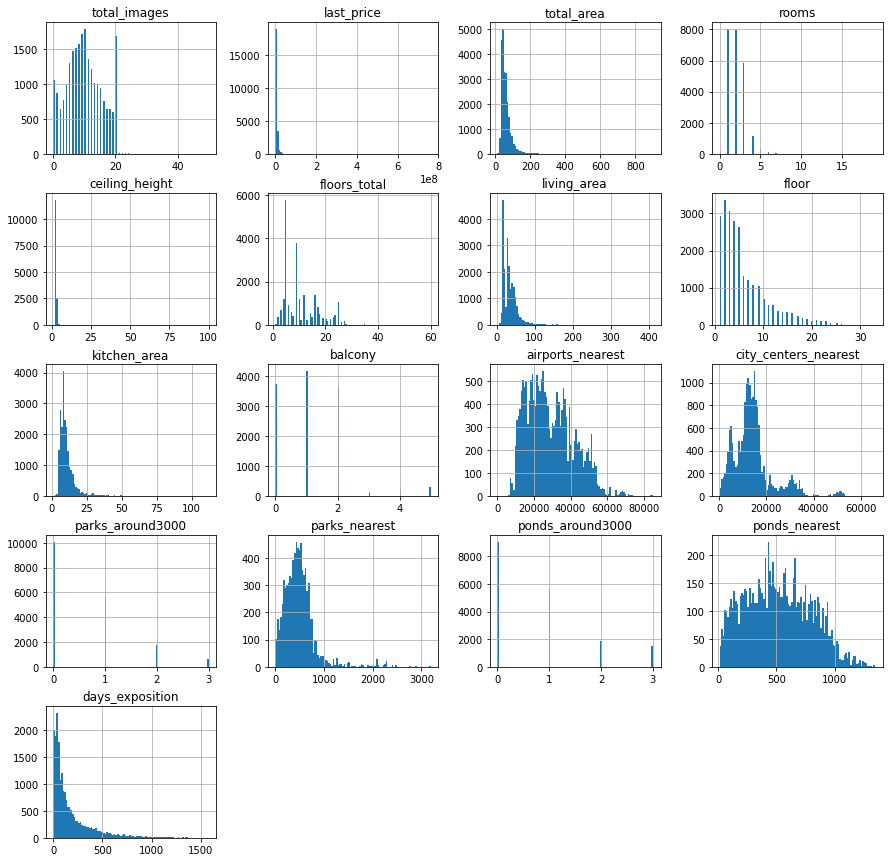

In [5]:
data.hist(bins=100, figsize=(15,15))
plt.show()

В 14 из 22 столбцов есть пропуски, у некоторых столбцов нужно изменить тип данных:
 - 3 - datetime
 - 9 - bool
 - 6, 13, 17, 19, 21 - integer
 
По некоторым столбцам, таким как floors_total, living_area, kitchen_area, есть выбросы, данные распределены неравномерно. Некоторые столбцы нужно рассматривать детальнее, сделаем это на следующем этапе.

### Предобработка данных

Напишем функцию для однотипных действий с числовыми столбцами.

In [6]:
def numeric_col(col):
    print ('Количество пропусков', data[col].isna().sum())
    print (data[col].head(), data[col].describe(), data[col].value_counts())
    data.boxplot(column=col, figsize=(3,6))
    plt.show()
    data[col].hist(bins=100, figsize=(10,3))
    plt.show()

Рассмотрим по очереди каждый столбец для выявления и обработки пропусков и некорректых значений, если потребуется.

#### Столбец last_price

С длинными цифрами работать не очень удобно, сократим до тысяч рублей.

In [7]:
data['last_price'] = data['last_price'] / 1000

Количество пропусков 0
0    13000.0
1     3350.0
2     5196.0
3    64900.0
4    10000.0
Name: last_price, dtype: float64 count     23699.000000
mean       6541.548772
std       10887.013268
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64 4500.000    342
3500.000    291
4000.000    260
4300.000    260
4200.000    259
           ... 
8495.000      1
5898.000      1
7253.540      1
4245.000      1
6188.957      1
Name: last_price, Length: 2978, dtype: int64


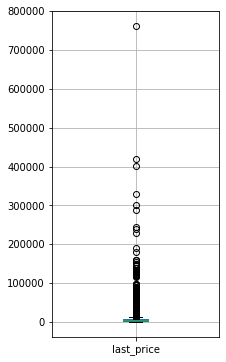

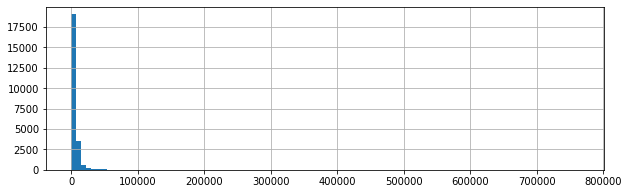

In [8]:
numeric_col('last_price')

В значениях присутствуют выбросы в обе стороны. Рассмотрим все значения выше 100 млн. руб. и ниже 500 тыс. руб.

In [9]:
data.query('last_price > 100000 | last_price < 500')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
793,20,135000.00,310.0,2018-05-22T00:00:00,4,3.30,5.0,250.00,2,NaN,...,50.00,NaN,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0
1026,20,155000.00,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.00,3,NaN,...,63.00,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1188,20,118000.00,290.6,2018-06-01T00:00:00,6,3.82,6.0,188.70,3,NaN,...,22.00,1.0,Санкт-Петербург,25309.0,6224.0,1.0,217.0,0.0,NaN,316.0
1300,14,120000.00,280.0,2018-07-12T00:00:00,5,4.70,4.0,162.00,3,NaN,...,30.00,NaN,Санкт-Петербург,24680.0,4247.0,1.0,464.0,3.0,339.0,225.0
1436,19,330000.00,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.00,5,NaN,...,40.00,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
1928,11,125000.00,224.5,2017-01-24T00:00:00,4,NaN,4.0,163.50,3,False,...,30.00,1.0,Санкт-Петербург,22805.0,2335.0,0.0,NaN,2.0,497.0,174.0
2243,9,130278.28,304.0,2015-07-24T00:00:00,5,3.11,9.0,NaN,7,NaN,...,NaN,0.0,Санкт-Петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,599.0
2536,16,159984.00,242.4,2015-08-27T00:00:00,4,3.85,9.0,131.00,7,NaN,...,20.00,0.0,Санкт-Петербург,21946.0,2242.0,1.0,679.0,1.0,227.0,501.0
3117,19,140000.00,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,...,60.00,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
4996,20,124000.00,124.5,2017-10-12T00:00:00,4,3.00,4.0,67.20,2,False,...,20.00,NaN,Санкт-Петербург,20399.0,1722.0,3.0,302.0,3.0,172.0,45.0


В интервал 500 т.р. - 100000 т.р. не вошло 51 объявление. Удалим их для более равномерного распределения данных.

Количество пропусков 0
0    13000.0
1     3350.0
2     5196.0
3    64900.0
4    10000.0
Name: last_price, dtype: float64 count    23644.000000
mean      6255.929262
std       6424.834222
min        520.000000
25%       3405.750000
50%       4650.000000
75%       6755.720500
max      99000.000000
Name: last_price, dtype: float64 4500.0     342
3500.0     291
4000.0     260
4300.0     260
4200.0     259
          ... 
5098.0       1
74000.0      1
4072.0       1
30891.3      1
62316.0      1
Name: last_price, Length: 2939, dtype: int64


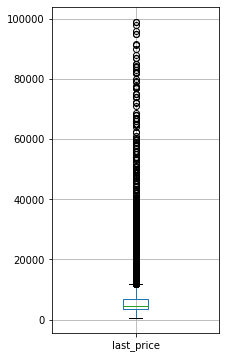

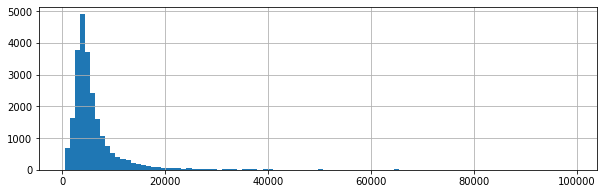

In [10]:
data = data.loc[(data['last_price'] < 100000) & (data['last_price'] > 500)]
numeric_col('last_price')

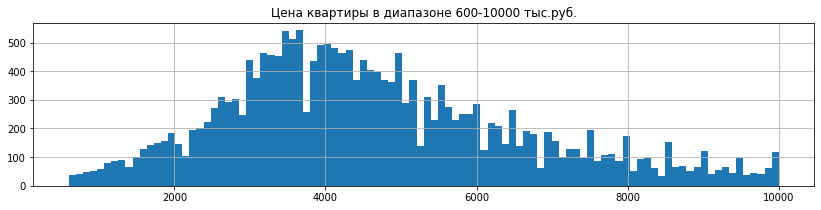

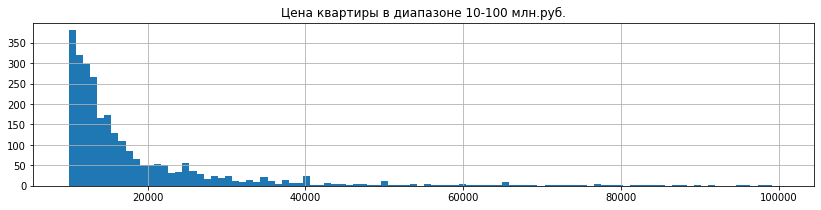

In [11]:
data.hist('last_price', bins=100, figsize=(14,3), range=(600, 10000))
plt.title('Цена квартиры в диапазоне 600-10000 тыс.руб.')
plt.show()
data.hist('last_price', bins=100, figsize=(14,3), range=(10000, 100000))
plt.title('Цена квартиры в диапазоне 10-100 млн.руб.')
plt.show()

Удалили 51 строку с выбросами. Пропусков значений в столбце нет.

#### Столбец total_area

Количество пропусков 0
0    108.0
1     40.4
2     56.0
3    159.0
4    100.0
Name: total_area, dtype: float64 count    23644.000000
mean        59.941016
std         33.477537
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        590.000000
Name: total_area, dtype: float64 45.00     419
42.00     382
60.00     347
31.00     346
44.00     345
         ... 
118.70      1
21.70       1
152.80      1
45.52       1
55.06       1
Name: total_area, Length: 2160, dtype: int64


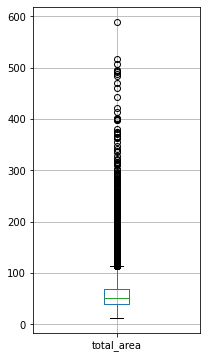

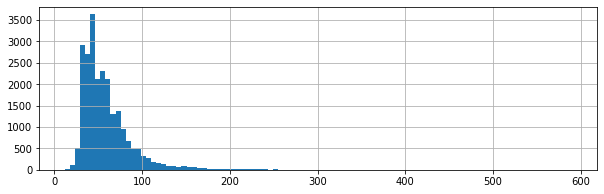

In [12]:
numeric_col('total_area')

Есть аномально выскокие значения, посмотрим сколько значений выше 400 кв.м.

In [13]:
data[data['total_area'] > 350]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
581,20,65000.000,365.00,2019-03-18T00:00:00,7,2.90,7.0,NaN,7,NaN,...,NaN,NaN,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN
660,3,49950.000,483.90,2017-10-04T00:00:00,7,3.20,6.0,312.5,4,NaN,...,26.40,NaN,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
866,5,25000.000,363.00,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,NaN,...,16.60,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
1388,20,59800.000,399.00,2015-01-21T00:00:00,5,5.60,6.0,NaN,6,NaN,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
1494,10,65000.000,364.00,2018-11-27T00:00:00,7,3.90,6.0,250.0,3,NaN,...,20.00,NaN,Санкт-Петербург,21988.0,3254.0,0.0,NaN,1.0,689.0,46.0
3676,12,28789.000,441.98,2019-01-23T00:00:00,4,NaN,6.0,NaN,6,NaN,...,35.05,NaN,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN
4237,1,50000.000,517.00,2017-10-14T00:00:00,7,NaN,4.0,332.0,3,NaN,...,22.00,NaN,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5042,20,35000.000,380.00,2017-08-17T00:00:00,6,NaN,3.0,198.0,2,NaN,...,50.00,0.0,Пушкин,18490.0,30643.0,1.0,527.0,1.0,668.0,15.0
5358,20,65000.000,590.00,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,...,100.00,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
5873,0,38000.000,400.00,2019-03-15T00:00:00,7,3.60,3.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,24889.0,5457.0,1.0,271.0,0.0,NaN,NaN


30 строк с аномальными значениями, не похоже что здесь есть ошибка. Поэтому удалим эти строки для сокращения количества выбросов.

In [14]:
print(len(data))
data = data.query('total_area <= 350')
print(len(data))

23644
23614


Количество пропусков 0
0    108.0
1     40.4
2     56.0
3    159.0
4    100.0
Name: total_area, dtype: float64 count    23614.000000
mean        59.479889
std         30.820399
min         12.000000
25%         40.000000
50%         52.000000
75%         69.400000
max        347.500000
Name: total_area, dtype: float64 45.00    419
42.00    382
60.00    347
31.00    346
44.00    345
        ... 
29.61      1
34.64      1
73.83      1
44.24      1
55.06      1
Name: total_area, Length: 2132, dtype: int64


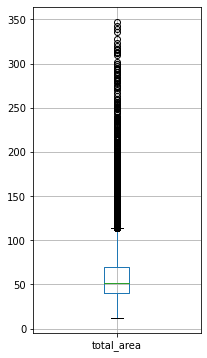

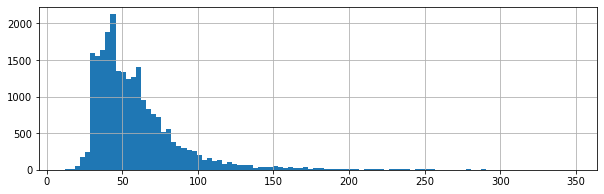

In [15]:
numeric_col('total_area')

Выбросов стало меньше после удаления 30 строк с слишком высокими значениями. Пропусков в этом столбце нет.

#### Столбец rooms

Количество пропусков 0
0    3
1    1
2    2
3    3
4    2
Name: rooms, dtype: int64 count    23614.000000
mean         2.060219
std          1.048770
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64 1     8035
2     7932
3     5809
4     1169
5      310
0      196
6       97
7       44
8        9
9        6
10       3
11       2
16       1
14       1
Name: rooms, dtype: int64


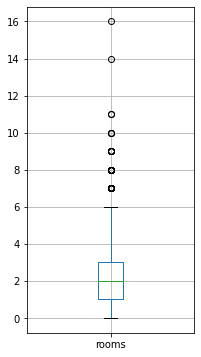

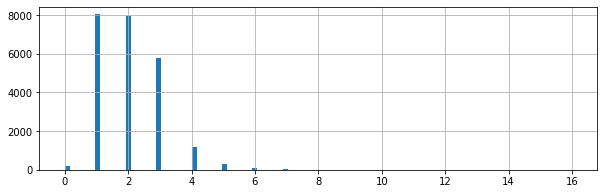

In [16]:
numeric_col('rooms')

В таблице у 197 квартир нет комнат, таких квартир не бывает.

In [17]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500.0,27.70,2017-09-28T00:00:00,0,NaN,24.0,18.00,4,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450.0,29.00,2017-11-11T00:00:00,0,NaN,9.0,18.00,8,NaN,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [18]:
data.query('rooms == 0')['total_area'].describe()

count    196.000000
mean      27.536276
std        8.368574
min       15.500000
25%       24.037500
50%       26.025000
75%       28.325000
max       98.400000
Name: total_area, dtype: float64

Вероятнее всего это всё однокомнатные квартиры/ студии, поэтому заменим 0 на 1.

In [19]:
data['rooms'] = data['rooms'].replace(0,1)

Количество пропусков 0
0    3
1    1
2    2
3    3
4    2
Name: rooms, dtype: int64 count    23614.000000
mean         2.068519
std          1.036315
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64 1     8231
2     7932
3     5809
4     1169
5      310
6       97
7       44
8        9
9        6
10       3
11       2
16       1
14       1
Name: rooms, dtype: int64


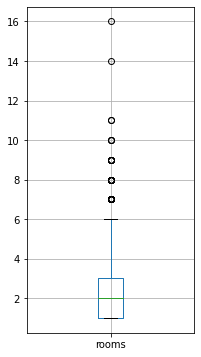

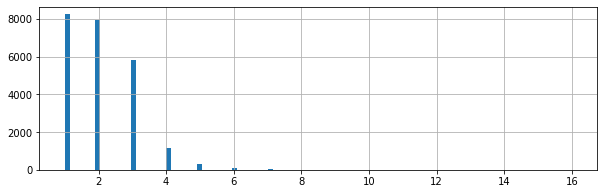

In [20]:
numeric_col('rooms')

Нулевые значения исправлены, уберем выбросы, где количество комнат больше 12.

In [21]:
print(len(data))
data = data.query('rooms <= 12')
print(len(data))

23614
23612


In [22]:
data['rooms'].describe()

count    23612.000000
mean         2.067423
std          1.029460
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

Удалили 2 строки с выбросами, нулевые значения заменили на единицу.

#### Столбец ceiling_height

Количество пропусков 9159
0    2.70
1     NaN
2     NaN
3     NaN
4    3.03
Name: ceiling_height, dtype: float64 count    14453.000000
mean         2.768849
std          1.261690
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64 2.50      3513
2.60      1646
2.70      1572
3.00      1108
2.80       992
          ... 
5.80         1
100.00       1
3.42         1
3.43         1
4.45         1
Name: ceiling_height, Length: 178, dtype: int64


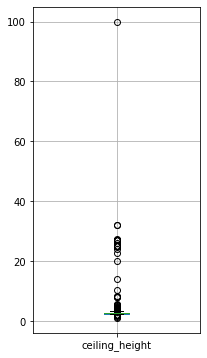

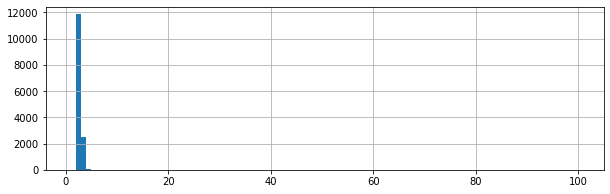

In [23]:
numeric_col('ceiling_height')

In [24]:
data.query('ceiling_height >= 20 and ceiling_height < 40')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000.0,25.0,2017-09-27T00:00:00,1,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,...,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,...,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


Судя по данным, это должна быть обынчая высота потолка, но была пропущена запятая. Разделим эти значения на 10.

In [25]:
ceiling_height_index = data.query('ceiling_height > 19 and ceiling_height < 35').index
data.loc[ceiling_height_index, 'ceiling_height'] = data.loc[ceiling_height_index, 'ceiling_height'] / 10

In [26]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.62,
         3.12,   2.53,   2.74,   2.96,   2.46,   5.  ,   2.79,   2.95,
         4.06,   2.94,   3.54,   3.53,   2.83,   2.4 ,   3.38,   3.01,
         3.65,   3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,
         3.98,   2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,
         3.87,   3.66,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.16,
         3.26,   3.34,   2.81,   3.44,   2.97,   3.14,   4.37,   2.68,
      

Значение 100 выглядит неправдоподобно, даже если поделить на 10, как делали ранее.
Нужно удалить значения, которые выше 10 метров и ниже 2-х метров, так как такой высоты потолков либо не существует, либо это большая редкость.

In [27]:
print(len(data))
ceiling_height_index = data.query('ceiling_height > 10 or ceiling_height < 2').index
data.drop(ceiling_height_index, inplace=True, axis=0)
print(len(data))

23612
23606


In [28]:
print("Кол-во пропусков", data['ceiling_height'].isna().sum())
print(data['ceiling_height'].describe())

Кол-во пропусков 9159
count    14447.000000
mean         2.725295
std          0.285657
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64


Аномальные значения убраны, осталось заполнить пропуски. Для замены лучше всего подойдет медианное значение, так как оно не подверженно влиянию тех значений которые расположены по концам столбца, где могут быть сильные отклонения, влияющие на среднюю величину.

In [29]:
ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)

In [30]:
print("Кол-во пропусков", data['ceiling_height'].isna().sum())
print(data['ceiling_height'].describe())

Кол-во пропусков 0
count    23606.000000
mean         2.696081
std          0.226461
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64


В ходе обработки данных столбца "ceiling_height" удалили 6 строк с аномальными значениями, исправили ошибочно введенные данные, пропуски заполнили медианным значением.

#### Столбец floors_total

Количество пропусков 86
0    16.0
1    11.0
2     5.0
3    14.0
4    14.0
Name: floors_total, dtype: float64 count    23520.000000
mean        10.688776
std          6.596908
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64 5.0     5772
9.0     3756
16.0    1374
12.0    1360
4.0     1191
10.0    1173
25.0    1073
6.0      902
17.0     833
3.0      658
7.0      579
14.0     552
18.0     505
24.0     469
8.0      384
2.0      374
15.0     365
23.0     352
19.0     339
22.0     286
20.0     269
13.0     228
11.0     203
27.0     164
21.0     158
26.0     124
35.0      24
1.0       24
28.0      21
36.0       3
29.0       1
60.0       1
52.0       1
34.0       1
33.0       1
Name: floors_total, dtype: int64


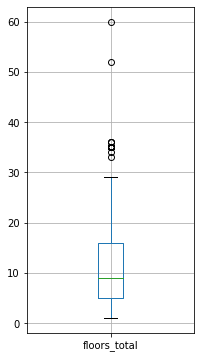

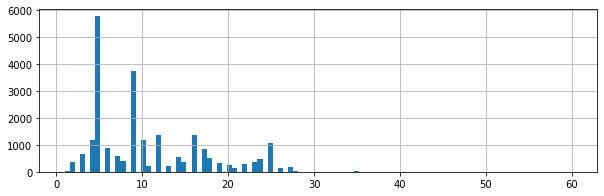

In [31]:
numeric_col('floors_total')

In [32]:
data = data.dropna(subset=['floors_total'])
print ('Количество пропусков', data['floors_total'].isna().sum())

Количество пропусков 0


Пропусков в данном столбце было всего 0,3%. Заполнять их медианным или средним значением будет неправильно, поэтому удалили их.

#### Столбец is_apartment

Проверим пропуски скорее всего это "не аппартаменты", так как аппартаменты это редкость, и заполним их значением "0".

In [33]:
data['is_apartment'].value_counts()

False    2720
True       48
Name: is_apartment, dtype: int64

In [34]:
data.loc[data['is_apartment'] != True, 'is_apartment'] = False
data['is_apartment'].value_counts()

False    23472
True        48
Name: is_apartment, dtype: int64

In [35]:
print ('Количество пропусков', data['is_apartment'].isna().sum())
data.head()

Количество пропусков 0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Пропуски заполнены значением 'False', тип данных поменяем позже.

#### Столбец living_area 

Количество пропусков 1850
0    51.0
1    18.6
2    34.3
3     NaN
4    32.0
Name: living_area, dtype: float64 count    21670.000000
mean        34.045525
std         19.938461
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        255.700000
Name: living_area, dtype: float64 18.00    882
17.00    672
30.00    598
16.00    482
20.00    481
        ... 
35.77      1
96.40      1
50.26      1
43.81      1
16.74      1
Name: living_area, Length: 1737, dtype: int64


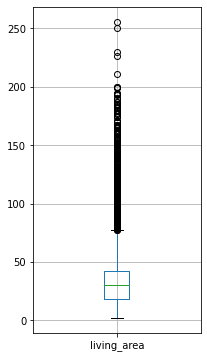

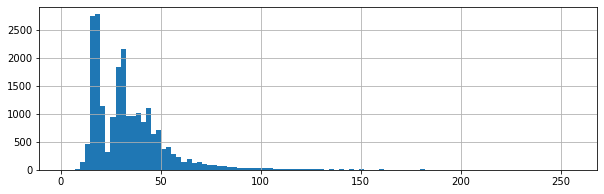

In [36]:
numeric_col('living_area')

Есть выбросы, проверим сколько объявлений с площадью больше 200 кв.м.

In [37]:
data.query('living_area > 200')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1085,16,75000.0,323.0,2017-07-10T00:00:00,5,4.00,5.0,255.7,4,False,...,66.0,NaN,Санкт-Петербург,23713.0,594.0,3.0,398.0,2.0,515.0,259.0
2580,6,30900.0,338.6,2017-10-16T00:00:00,7,3.86,6.0,230.0,4,False,...,20.0,NaN,Санкт-Петербург,24957.0,5641.0,0.0,NaN,0.0,NaN,406.0
15701,12,83000.0,293.6,2017-11-10T00:00:00,4,2.65,9.0,250.0,7,False,...,35.0,NaN,Санкт-Петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,NaN
16915,14,29000.0,292.2,2017-01-12T00:00:00,9,3.35,5.0,225.9,4,False,...,32.9,1.0,Санкт-Петербург,24892.0,5162.0,2.0,263.0,0.0,NaN,825.0
21685,7,22160.0,277.6,2017-08-19T00:00:00,7,3.80,6.0,211.0,3,False,...,17.8,0.0,Санкт-Петербург,25761.0,5671.0,2.0,375.0,1.0,479.0,22.0


 Всего 5 объявлений (меньше 1%), удалим их для выравнивания распределения.

In [38]:
print(len(data))
data = data.loc[(data['living_area'] <= 200) | (data['living_area'].isna()==True)]
print(len(data))

23520
23515


Рассмотрим так же слишком низкие значения.

In [39]:
data.query('living_area < 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440.0,41.0,2017-07-02T00:00:00,1,2.65,17.0,3.0,17,False,...,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350.0,52.0,2018-02-06T00:00:00,2,3.00,6.0,2.0,2,False,...,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
21758,0,2330.0,23.0,2018-01-01T00:00:00,1,2.65,24.0,2.0,22,False,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
23574,14,64990.0,139.0,2015-11-24T00:00:00,3,3.00,8.0,3.0,8,False,...,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


Вероятно здесь допущена опечатка, умножим значения на 10.

In [40]:
data.loc[data['living_area'] < 5, 'living_area'] = data.loc[data['living_area'] < 5, 'living_area'] * 10

In [41]:
data['living_area'].describe()

count    21665.000000
mean        34.003412
std         19.701033
min          5.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        200.000000
Name: living_area, dtype: float64

От сильных выбросов избавились, пропуски будем заполнять медианными значениями по количеству комнат.

In [42]:
median_range = data.groupby('rooms')['living_area'].median()
median_range

rooms
1      17.60
2      30.50
3      45.00
4      63.31
5      90.00
6     122.00
7     131.50
8     160.00
9     169.90
10    161.40
11    133.90
Name: living_area, dtype: float64

Создадим функцию для заполнения пропусков в data значениями из median_range.

In [43]:
def med_insert(name):
    if name not in median_range:
        return np.nan
    return median_range[name]

Проверим правильность работы функции.

In [44]:
print('1 комната - ', med_insert(1)) 
print('5 комнат - ', med_insert(5))
print('12 комнат - ', med_insert(12)) 

1 комната -  17.6
5 комнат -  90.0
12 комнат -  nan


Применим функцию к пропускам в столбце.

In [45]:
data.loc[data['living_area'].isna()==True, 'living_area'] = data['rooms'].apply(med_insert)
data['living_area'].isna().sum()

0

Количество пропусков 0
0    51.0
1    18.6
2    34.3
3    45.0
4    32.0
Name: living_area, dtype: float64 count    23515.000000
mean        33.872180
std         19.441125
min          5.000000
25%         18.400000
50%         30.300000
75%         42.500000
max        200.000000
Name: living_area, dtype: float64 18.00    882
17.60    748
30.50    698
17.00    672
30.00    600
        ... 
35.77      1
96.40      1
50.26      1
43.81      1
16.74      1
Name: living_area, Length: 1731, dtype: int64


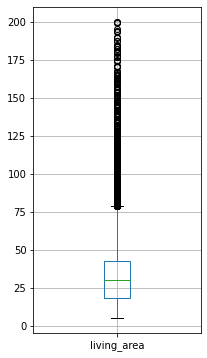

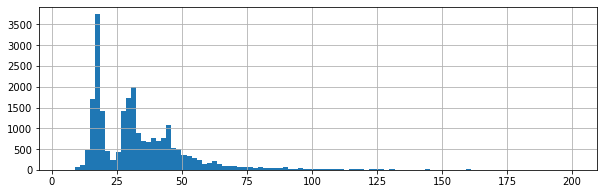

In [46]:
numeric_col('living_area')

#### Столбец kitchen_area

Количество пропусков 2210
0    25.0
1    11.0
2     8.3
3     NaN
4    41.0
Name: kitchen_area, dtype: float64 count    21305.000000
mean        10.485534
std          5.622162
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64 6.00     1299
10.00    1261
8.00     1108
9.00     1099
7.00     1062
         ... 
7.12        1
13.73       1
14.74       1
53.10       1
16.74       1
Name: kitchen_area, Length: 953, dtype: int64


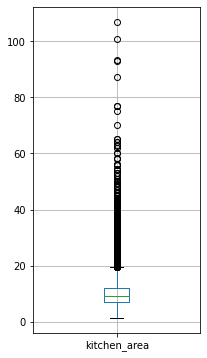

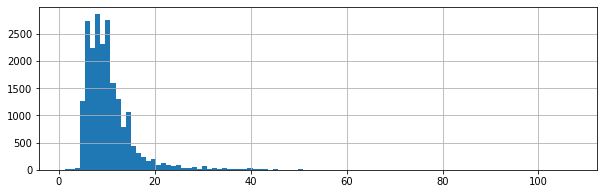

In [47]:
numeric_col('kitchen_area')

В столбце есть пропуски и выбросы. Сначала разберемся с выбросами, затем по аналогии с living_area заполним пропуски.

In [48]:
data.query('kitchen_area > 60')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
492,18,95000.0,216.0,2017-12-05T00:00:00,4,3.00,5.0,86.0,4,False,...,77.0,NaN,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,14.0
2489,9,12500.0,255.0,2017-04-21T00:00:00,3,2.65,2.0,153.9,2,False,...,100.7,0.0,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,102.0
4394,20,57000.0,174.0,2015-11-09T00:00:00,3,3.20,10.0,95.0,6,False,...,77.0,NaN,Санкт-Петербург,31706.0,4166.0,1.0,193.0,3.0,199.0,1039.0
6193,19,24300.0,230.0,2016-06-03T00:00:00,4,2.65,3.0,90.0,2,False,...,70.0,0.0,Санкт-Петербург,39422.0,15354.0,0.0,NaN,1.0,345.0,397.0
10867,1,56844.5,177.9,2015-01-15T00:00:00,3,2.65,6.0,87.2,5,True,...,87.2,NaN,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,NaN
13139,20,55000.0,288.0,2017-11-14T00:00:00,5,3.51,6.0,100.7,2,False,...,62.0,NaN,Санкт-Петербург,26228.0,4930.0,2.0,175.0,1.0,682.0,338.0
14644,17,47000.0,150.0,2017-02-28T00:00:00,4,3.70,6.0,58.0,5,False,...,75.0,1.0,Санкт-Петербург,16085.0,7616.0,0.0,NaN,0.0,NaN,507.0
14900,20,25900.0,125.6,2018-08-14T00:00:00,2,4.00,4.0,42.7,4,False,...,62.5,2.0,Пушкин,13426.0,25580.0,0.0,NaN,0.0,NaN,194.0
15780,9,12990.0,119.6,2017-03-13T00:00:00,3,3.00,5.0,36.4,4,False,...,64.0,4.0,Пушкин,18616.0,30770.0,1.0,569.0,0.0,NaN,NaN
16239,5,82400.0,181.1,2017-05-24T00:00:00,3,3.90,9.0,58.2,4,False,...,93.2,NaN,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,501.0


16 строк (меньше 1%) с очень высокими значениями, удалим их для сокращения количества выбросов.

In [49]:
print(len(data))
data = data.loc[(data['kitchen_area'] <= 60) | (data['kitchen_area'].isna()==True)]
print(len(data))
data['kitchen_area'].describe()

23515
23499


count    21289.000000
mean        10.435845
std          5.308986
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max         60.000000
Name: kitchen_area, dtype: float64

С высокими значениями разобрались, теперь рассмотрим низкие.

In [50]:
data.query('kitchen_area < 3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
906,15,2600.000,27.00,2017-07-10T00:00:00,1,2.75,23.0,18.0,18,False,...,2.00,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
6262,9,3100.000,24.00,2018-06-25T00:00:00,2,3.00,5.0,16.0,5,False,...,2.00,NaN,Санкт-Петербург,31960.0,4914.0,2.0,426.0,1.0,936.0,54.0
7950,3,5967.734,66.40,2017-02-07T00:00:00,2,2.65,4.0,44.4,2,False,...,2.89,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,0.0,NaN,335.0
8729,9,2200.000,18.40,2018-08-20T00:00:00,1,2.52,3.0,14.0,3,False,...,2.40,NaN,Пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0
9138,17,2920.000,23.29,2018-12-12T00:00:00,1,2.65,3.0,21.0,1,False,...,2.00,NaN,Санкт-Петербург,19506.0,4008.0,0.0,NaN,2.0,45.0,107.0
11033,6,5350.000,32.00,2016-04-20T00:00:00,1,2.65,14.0,16.0,10,False,...,2.00,0.0,Санкт-Петербург,19008.0,3953.0,0.0,NaN,1.0,69.0,210.0
16367,2,2720.000,25.70,2017-10-30T00:00:00,1,2.65,19.0,22.6,11,False,...,2.00,NaN,Санкт-Петербург,14472.0,13268.0,0.0,NaN,0.0,NaN,109.0
17834,5,2940.000,34.70,2017-10-09T00:00:00,1,2.65,26.0,15.5,14,False,...,2.30,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,318.0
19642,5,1190.000,14.00,2018-07-29T00:00:00,1,2.65,5.0,11.0,1,False,...,2.00,NaN,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
20217,7,4250.000,28.50,2019-05-01T00:00:00,1,2.80,14.0,19.5,10,False,...,1.30,NaN,Санкт-Петербург,37199.0,12721.0,0.0,NaN,0.0,NaN,NaN


11 слишком низких значений. На ошибку с запятой, как в столбце living_area это не похоже, поэтому придется удалить эти строки.

23499
23488


<AxesSubplot:>

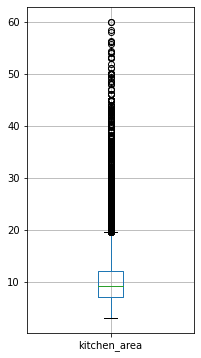

In [51]:
print(len(data))
data = data = data.loc[(data['kitchen_area'] >= 3) | (data['kitchen_area'].isna()==True)]
print(len(data))
data['kitchen_area'].describe()
data.boxplot(column='kitchen_area', figsize=(3,6))

От выбросов частично избавились, теперь заполним пропуски медианными значениями по аналогии с living_area.

In [52]:
median_range = data.groupby('rooms')['kitchen_area'].median()
median_range

rooms
1      9.085
2      8.700
3      9.500
4     11.000
5     15.000
6     19.000
7     17.400
8     23.600
9     12.800
10    19.800
11    12.600
Name: kitchen_area, dtype: float64

In [53]:
data.loc[data['kitchen_area'].isna()==True, 'kitchen_area'] = data['rooms'].apply(med_insert)
data['kitchen_area'].isna().sum()

0

Количество пропусков 0
0    25.0
1    11.0
2     8.3
3     9.5
4    41.0
Name: kitchen_area, dtype: float64 count    23488.000000
mean        10.332150
std          5.075147
min          3.000000
25%          7.300000
50%          9.085000
75%         11.440000
max         60.000000
Name: kitchen_area, dtype: float64 6.00     1299
10.00    1261
8.00     1108
9.00     1099
7.00     1062
         ... 
7.12        1
13.73       1
14.74       1
53.10       1
16.74       1
Name: kitchen_area, Length: 936, dtype: int64


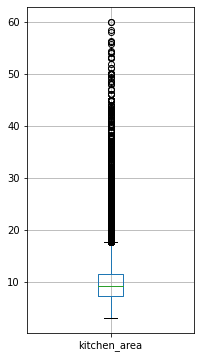

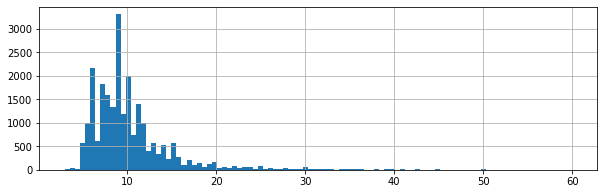

In [54]:
numeric_col('kitchen_area')

Пропуски заполнили медианными значенияеми площади кухни по количеству комнат, слишком высокие и низкие значения удалили.

#### Столбец balcony

Количество пропусков 11405
0    NaN
1    2.0
2    0.0
3    0.0
4    NaN
Name: balcony, dtype: float64 count    12083.000000
mean         1.154432
std          1.068961
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64 1.0    4184
0.0    3688
2.0    3650
5.0     301
4.0     180
3.0      80
Name: balcony, dtype: int64


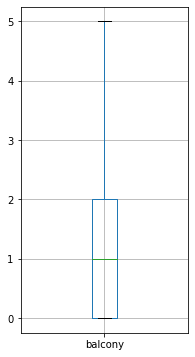

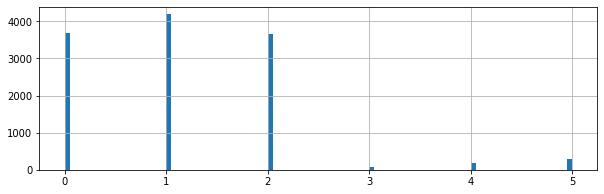

In [55]:
numeric_col('balcony')

Вероятнее пропуски в данном столбце означают отсутствие балкона, поэтому заполним все пропуски нулем.

In [56]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].describe()

count    23488.000000
mean         0.593878
std          0.959543
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

Статистика сильно изменилась, но заполнять пропуски какими-то другими значениям не логично, но и выяснить реальное количество балконов мы не можем, поэтому оставим так.

#### Столбец locality_name

In [57]:
print ('Количество уникальных значений:', data['locality_name'].nunique())
data['locality_name'].unique()

Количество уникальных значений: 361


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [58]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')
location_list = [
    'поселок ', 'деревня ', 'коттеджный ', 'городского типа ',
    'городской ', 'садовое товарищество ', 'село ',
    'садоводческое некоммерческое товарищество ', 'при железнодорожной ', 'станции '
]

In [59]:
for location in location_list:
        data['locality_name'] = data['locality_name'].str.replace(location,'')
        
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [60]:
data = data.dropna(subset=['locality_name'])

In [61]:
print ('Количество уникальных значений:', data['locality_name'].nunique())
print ('Количество пропусков', data['locality_name'].isna().sum())

Количество уникальных значений: 302
Количество пропусков 0


В ходе обработки столбца сократили количество уникальных значений на 59. В столбце было 48 пропусков, это всего 0,2% от общего количества, строки с пропусками удалили.

#### Столбец airports_nearest

Количество пропусков 5500
0    18863.0
1    12817.0
2    21741.0
3    28098.0
4    31856.0
Name: airports_nearest, dtype: float64 count    17940.000000
mean     28810.172408
std      12654.471898
min          0.000000
25%      18539.000000
50%      26770.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64 37434.0    61
21928.0    32
39946.0    30
44870.0    29
37407.0    27
           ..
13049.0     1
24159.0     1
42695.0     1
53478.0     1
20875.0     1
Name: airports_nearest, Length: 8216, dtype: int64


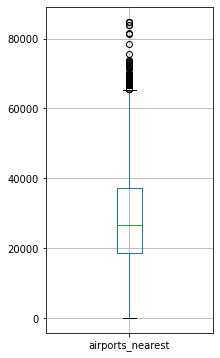

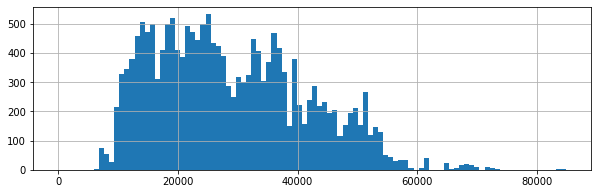

In [62]:
numeric_col('airports_nearest')

В столбце есть нулевое значение, его заменим на NaN, дальше заполним все возможные пропуски медианным значением в зависимости от населенного пункта.

In [63]:
data.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,False,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Маловероятно что продают часть аэропорта, поэтому заменим это значение на NaN, дальше заполним вместе с остальными пропусками.

In [64]:
data.loc[21085, 'airports_nearest'] = np.nan

In [65]:
median_range = data.groupby('locality_name')['airports_nearest'].median().dropna().sort_values()
median_range

locality_name
Александровская    12896.5
Пушкин             15766.0
Шушары             17427.0
Павловск           20529.5
Петро-Славянка     20605.0
Красное Село       25723.5
Металлострой       25758.0
Колпино            26232.0
Усть-Ижора         26510.5
Санкт-Петербург    26785.0
Стрельна           28317.0
Понтонный          30642.0
Саперный           34147.5
Петергоф           39231.0
Ломоносов          48415.5
Левашово           52693.0
Парголово          53426.0
Песочный           54831.5
Лисий Нос          55909.0
Сестрорецк         56692.0
Белоостров         57769.0
Репино             61797.5
Кронштадт          67850.0
Зеленогорск        72282.0
Молодежное         84665.0
Name: airports_nearest, dtype: float64

Проверим правильность работы функции med_insert.

In [66]:
print('Шушары - ', med_insert('Шушары')) 
print('Сестрорецк - ', med_insert('Сестрорецк'))

Шушары -  17427.0
Сестрорецк -  56692.0


In [67]:
data.loc[data['airports_nearest'].isna()==True, 'airports_nearest'] = data['locality_name'].apply(med_insert)
data['airports_nearest'].isna().sum()

5413

Заполнили 87 пропусков. Все еще осталось очень много пропусков, но логичных вариантов заполнения нет, поэтому оставим как есть.

#### Столбец city_centers_nearest

Количество пропусков 5479
0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
Name: city_centers_nearest, dtype: float64 count    17961.000000
mean     14228.910194
std       8608.092129
min        181.000000
25%       9294.000000
50%      13123.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64 8460.0     61
20802.0    31
10720.0    30
8434.0     27
20444.0    26
           ..
15882.0     1
8565.0      1
5278.0      1
11575.0     1
4234.0      1
Name: city_centers_nearest, Length: 7586, dtype: int64


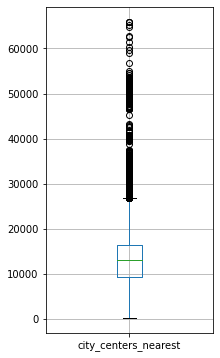

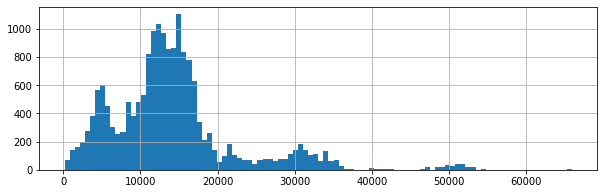

In [68]:
numeric_col('city_centers_nearest')

5479 пропусков, нулевых значений нет. Повторим процедуру по аналогии с предыдущим столбцом.

In [69]:
median_range = data.groupby('locality_name')['city_centers_nearest'].median().dropna().sort_values()
median_range

locality_name
Санкт-Петербург    12258.0
Парголово          19311.0
Стрельна           23506.0
Шушары             24212.0
Левашово           25727.0
Песочный           26099.5
Петро-Славянка     27165.0
Александровская    27468.0
Металлострой       27602.0
Пушкин             27920.0
Усть-Ижора         28222.5
Лисий Нос          28226.0
Красное Село       29148.5
Колпино            32018.0
Понтонный          32354.0
Павловск           32683.0
Петергоф           33771.0
Сестрорецк         34821.0
Саперный           35859.5
Белоостров         38868.0
Репино             42896.5
Кронштадт          49575.0
Ломоносов          51677.0
Зеленогорск        53381.0
Молодежное         65764.0
Name: city_centers_nearest, dtype: float64

In [70]:
data.loc[data['city_centers_nearest'].isna()==True, 'city_centers_nearest'] = data['locality_name'].apply(med_insert)
data['city_centers_nearest'].isna().sum()

5413

Заполнили всего 66 пропусков. Для остальных логичных вариантов заполнения нет.

#### Столбцы parks_around3000 и ponds_around3000

In [71]:
print('Количество пропусков в parks_around3000:', data['parks_around3000'].isna().sum())
print('Количество пропусков в ponds_around3000:', data['ponds_around3000'].isna().sum())

Количество пропусков в parks_around3000: 5478
Количество пропусков в ponds_around3000: 5478


In [72]:
print(data['parks_around3000'].value_counts())
print(data['ponds_around3000'].value_counts())

0.0    10006
1.0     5621
2.0     1709
3.0      626
Name: parks_around3000, dtype: int64
0.0    8998
1.0    5641
2.0    1860
3.0    1463
Name: ponds_around3000, dtype: int64


In [73]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
print('Количество пропусков в parks_around3000:', data['parks_around3000'].isna().sum())
print('Количество пропусков в ponds_around3000:', data['ponds_around3000'].isna().sum())

Количество пропусков в parks_around3000: 0
Количество пропусков в ponds_around3000: 0


В обоих столбцах больше всего нулевых значений, так же вероятнее всего то, что пропуски в этих столбцах означают отсутствие в пределах 3 км парка/водоема. Поэтому заполнили пропуски нулевыми значениями.
Подозрительно что совпадало количество пропусков. Вероятно это программная ошибка, может быть для каких-то населенных пунктов недоступна форма для заполнения этих параметров.

#### Столбцы parks_nearest и ponds_nearest

In [74]:
print('Количество пропусков в parks_nearest:', data['parks_nearest'].isna().sum())
print('Количество пропусков в ponds_nearest:', data['ponds_nearest'].isna().sum())

Количество пропусков в parks_nearest: 15480
Количество пропусков в ponds_nearest: 14476


Попробуем заполнить пропуски в эти столбцах по аналогии с другими столбцами с расстоянием.
Начнем с parks_nearest.

In [75]:
median_range = data.groupby('locality_name')['parks_nearest'].median().dropna().sort_values()
median_range

locality_name
Зеленогорск        147.5
Кронштадт          293.0
Петергоф           294.0
Павловск           312.0
Сестрорецк         367.0
Колпино            393.0
Пушкин             398.0
Ломоносов          407.0
Красное Село       435.0
Санкт-Петербург    461.0
Стрельна           700.0
Парголово          733.0
Name: parks_nearest, dtype: float64

In [76]:
data.loc[data['parks_nearest'].isna()==True, 'parks_nearest'] = data['locality_name'].apply(med_insert)

Теперь столбец ponds_nearest

In [77]:
median_range = data.groupby('locality_name')['ponds_nearest'].median().dropna().sort_values()
median_range

locality_name
Красное Село       225.5
Кронштадт          312.0
Белоостров         320.0
Сестрорецк         372.0
Саперный           419.5
Пушкин             445.0
Павловск           458.0
Петергоф           474.0
Санкт-Петербург    506.0
Зеленогорск        507.0
Колпино            509.0
Ломоносов          553.0
Шушары             584.5
Парголово          593.0
Понтонный          638.0
Петро-Славянка     663.0
Александровская    711.5
Стрельна           859.0
Name: ponds_nearest, dtype: float64

In [78]:
data.loc[data['ponds_nearest'].isna()==True, 'ponds_nearest'] = data['locality_name'].apply(med_insert)

In [79]:
print('Количество пропусков в parks_nearest:', data['parks_nearest'].isna().sum())
print('Количество пропусков в ponds_nearest:', data['ponds_nearest'].isna().sum())

Количество пропусков в parks_nearest: 5967
Количество пропусков в ponds_nearest: 5498


Заполнили почти 2/3 пропусков медианными значениями в зависимости от населенного пункта.

#### Столбец days_exposition

Количество пропусков 3150
0      NaN
1     81.0
2    558.0
3    424.0
4    121.0
Name: days_exposition, dtype: float64 count    20290.000000
mean       180.333218
std        219.307674
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64 45.0      874
60.0      538
7.0       233
30.0      208
90.0      199
         ... 
969.0       1
1147.0      1
1148.0      1
1345.0      1
1174.0      1
Name: days_exposition, Length: 1137, dtype: int64


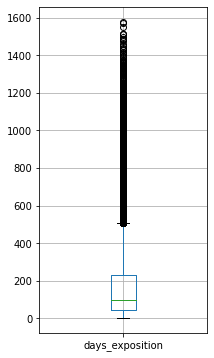

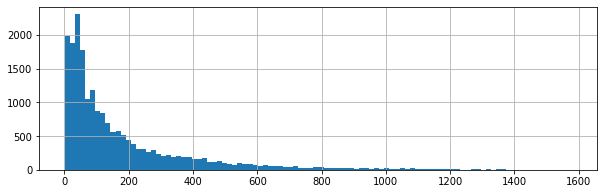

In [80]:
numeric_col('days_exposition')

Данные выглядят странно. Много объявлений с очень большим сроком размещения, похоже их просто забыли снять с размещения. Посмотрим сколько объявлений со сроком размещения больше 2,5 лет. Количество пропусков достаточно велико для удаления, будем заполнять их медианными значениями по населенному пункту. 

In [81]:
data.query('days_exposition > 900')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
42,13,22000.000,161.80,2015-07-08T00:00:00,4,2.80,4.0,80.90,2,False,...,17.600,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
109,2,7497.600,62.50,2015-12-08T00:00:00,2,2.65,5.0,35.50,5,False,...,9.500,0.0,Пушкин,14517.0,26670.0,1.0,517.0,0.0,445.0,1048.0
201,5,10880.000,123.10,2015-11-12T00:00:00,6,3.20,5.0,89.00,2,False,...,11.000,0.0,Санкт-Петербург,26009.0,3369.0,2.0,516.0,0.0,506.0,992.0
319,19,4850.000,59.70,2015-03-19T00:00:00,3,2.50,5.0,47.40,4,False,...,6.400,1.0,Санкт-Петербург,43095.0,15599.0,0.0,461.0,0.0,506.0,974.0
353,4,5990.000,43.50,2015-05-08T00:00:00,1,3.00,5.0,25.00,4,False,...,9.400,0.0,Санкт-Петербург,10527.0,10278.0,1.0,93.0,0.0,506.0,1292.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23540,10,1500.000,43.70,2016-06-28T00:00:00,2,2.55,3.0,28.00,2,False,...,7.300,1.0,Рабитицы,NaN,NaN,0.0,NaN,0.0,NaN,1007.0
23544,3,5000.000,49.00,2015-03-10T00:00:00,1,2.65,28.0,17.60,24,False,...,9.085,0.0,Санкт-Петербург,20028.0,21740.0,0.0,461.0,1.0,400.0,943.0
23585,1,5953.044,89.60,2015-09-03T00:00:00,3,2.75,23.0,47.70,17,False,...,16.700,0.0,Санкт-Петербург,26726.0,8880.0,0.0,461.0,1.0,624.0,939.0
23598,8,4300.000,33.40,2016-03-29T00:00:00,1,2.58,20.0,15.10,6,False,...,8.600,0.0,Санкт-Петербург,33695.0,14794.0,0.0,461.0,0.0,506.0,971.0


Довольно много строк входит в этот диапазон, но данные о сроках размещения действительно выглядят сомнительно. Поэтому уберем из таблицы все значения выше 900 дней.

In [82]:
print(len(data))
data = data.loc[(data['days_exposition'] < 900) | (data['days_exposition'].isna()==True)]
print(len(data))

23440
23035


In [83]:
median_range = data.groupby('locality_name')['days_exposition'].median().dropna().sort_values(ascending=False)
median_range

locality_name
Коробицыно            750.0
Большая Пустомержа    627.0
Мины                  540.0
Суйда                 503.0
Высоцк                438.0
                      ...  
Садко                   7.0
Яльгелево               7.0
Счастье                 7.0
Володарское             5.0
Заводской               5.0
Name: days_exposition, Length: 277, dtype: float64

In [84]:
data.loc[data['days_exposition'].isna()==True, 'days_exposition'] = data['locality_name'].apply(med_insert)
print('Количество пропусков:', data['days_exposition'].isna().sum())

Количество пропусков: 33


Заполнили почти все пропуски, оставшиеся 33 пропуска удалим.

In [85]:
data = data.dropna(subset=['days_exposition'])
print('Количество пропусков:', data['days_exposition'].isna().sum())

Количество пропусков: 0


In [86]:
display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,91.0
1,7,3350.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,584.5,81.0
2,10,5196.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,False,...,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23002 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23002 non-null  int64  
 1   last_price            23002 non-null  float64
 2   total_area            23002 non-null  float64
 3   first_day_exposition  23002 non-null  object 
 4   rooms                 23002 non-null  int64  
 5   ceiling_height        23002 non-null  float64
 6   floors_total          23002 non-null  float64
 7   living_area           23002 non-null  float64
 8   floor                 23002 non-null  int64  
 9   is_apartment          23002 non-null  object 
 10  studio                23002 non-null  bool   
 11  open_plan             23002 non-null  bool   
 12  kitchen_area          23002 non-null  float64
 13  balcony               23002 non-null  float64
 14  locality_name         23002 non-null  object 
 15  airports_nearest   

In [87]:
int_cols = ['floors_total', 'parks_around3000', 
            'ponds_around3000', 'balcony', 'days_exposition']

for col in int_cols:
    data[col] = data[col].astype(int)
    
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data['is_apartment'] = data['is_apartment'].astype('bool')

In [88]:
display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,91
1,7,3350.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,11.0,2,Шушары,12817.0,18603.0,0,NaN,0,584.5,81
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,9.5,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23002 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23002 non-null  int64         
 1   last_price            23002 non-null  float64       
 2   total_area            23002 non-null  float64       
 3   first_day_exposition  23002 non-null  datetime64[ns]
 4   rooms                 23002 non-null  int64         
 5   ceiling_height        23002 non-null  float64       
 6   floors_total          23002 non-null  int64         
 7   living_area           23002 non-null  float64       
 8   floor                 23002 non-null  int64         
 9   is_apartment          23002 non-null  bool          
 10  studio                23002 non-null  bool          
 11  open_plan             23002 non-null  bool          
 12  kitchen_area          23002 non-null  float64       
 13  balcony         

**Вывод:**
В результате предобработки было удалено 696 строк с пропусками в тех или иных значениях. У столбцов 'floors_total', 'parks_around3000', 'ponds_around3000', 'days_exposition' и 'balcony' тип данных изменен на integer, так как данные в этих столбцах могут быть только целочисленные. Тип данных 'first_day_exposition' изменен на datetime, так как в нем записана дата размещения объявления, в столбце is_apartment тип изменен на bool.

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра

In [89]:
data['sqm_price'] = (data['last_price'] / data['total_area']).round(2)

#### День недели, месяц и год публикации объявления

In [90]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month_exp'] = data['first_day_exposition'].dt.month
data['year_exp'] = data['first_day_exposition'].dt.year

In [91]:
data.loc[:, ['first_day_exposition','weekday', 'month_exp', 'year_exp']].head(10)

,first_day_exposition,weekday,month_exp,year_exp
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018
5,2018-09-10,0,9,2018
6,2017-11-02,3,11,2017
7,2019-04-18,3,4,2019
8,2018-05-23,2,5,2018
9,2017-02-26,6,2,2017


#### Тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [92]:
def categorize_floor(row):
    
    floor = row['floor']
    floors_total = row['floors_total']
    
    try:
        if floor == floors_total:
            return 'последний'
        elif floor == 1:
            return 'первый'
        else:
            return 'другой'
    except:
        return 'нет категории'

In [93]:
data['floor_type'] = data.apply(categorize_floor, axis=1)

Проверим правильность работы функции.

In [94]:
data.loc[:,['floor', 'floors_total', 'floor_type']].head(20)

,floor,floors_total,floor_type
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой
5,5,12,другой
6,6,26,другой
7,22,24,другой
8,26,27,другой
9,7,9,другой


#### Расстояние до центра города в километрах

In [95]:
print(data['city_centers_nearest'].head(10))
data['city_centers_nearest'] = (data['city_centers_nearest'] / 1000).round(0)
data['city_centers_nearest'].head(10)

0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
5        NaN
6    19143.0
7    11634.0
8        NaN
9    15008.0
Name: city_centers_nearest, dtype: float64


0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
5     NaN
6    19.0
7    12.0
8     NaN
9    15.0
Name: city_centers_nearest, dtype: float64

**Вывод:**
В таблицу добавили 5 новых столбцов: стоимость одного квадратного метра, день недели, месяц и год публикации объявления, столбец с категориями этажа квартиры (первый/последний, другой). Данные в столбце 'city_centers_nearest' перевели из метров в километры, изменить тип данных в этом столбце на integer не получается, так как в нем есть пропуски. Поэтому использовали округление.

### Проведите исследовательский анализ данных

#### Изучение параметров объектов

##### Общая и жилая площади, площадь кухни

**Общая площадь**

Количество пропусков 0
0    108.0
1     40.4
2     56.0
3    159.0
4    100.0
Name: total_area, dtype: float64 count    23002.000000
mean        59.056023
std         30.073676
min         12.000000
25%         40.000000
50%         51.800000
75%         69.000000
max        347.500000
Name: total_area, dtype: float64 45.00     414
42.00     377
31.00     343
44.00     341
60.00     339
         ... 
170.70      1
50.94       1
136.20      1
32.42       1
55.06       1
Name: total_area, Length: 2058, dtype: int64


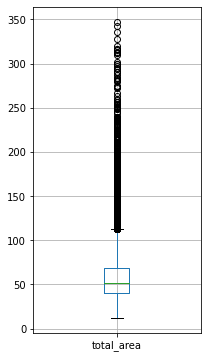

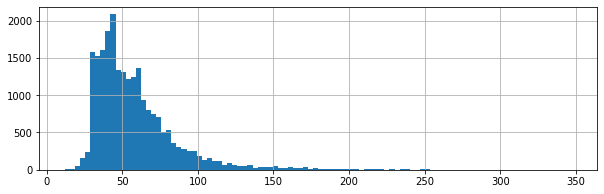

In [96]:
numeric_col('total_area')

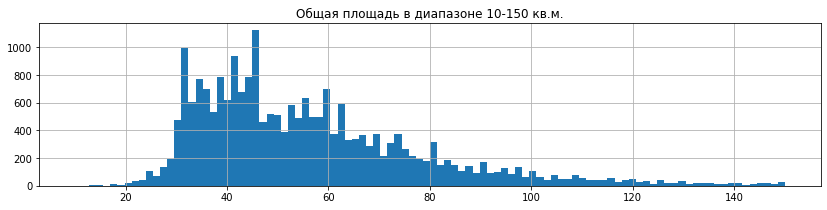

In [97]:
data['total_area'].hist(range=(10,150),figsize=(14,3), bins=100)
plt.title('Общая площадь в диапазоне 10-150 кв.м.')
plt.show()

Больше всего квартир с площадями 30-46 кв.м - это, похоже, самые популярные 1 и 2-х комнатные. Далее идут скорее всего 2 и 3 комнатные с площадью до 75 кв.м. Количество с большими площадами, начинает обратнопропорционально убывать - чем больше площадь, тем квартир меньше. Также видно, что квартиры сильно меньше 30 кв.м тоже довольно редки.

**Жилая площадь**

Количество пропусков 0
0    51.0
1    18.6
2    34.3
3    45.0
4    32.0
Name: living_area, dtype: float64 count    23002.000000
mean        33.703373
std         19.263720
min          5.000000
25%         18.300000
50%         30.100000
75%         42.200000
max        200.000000
Name: living_area, dtype: float64 18.00     875
17.60     733
30.50     686
17.00     665
30.00     588
         ... 
33.47       1
20.97       1
17.45       1
199.00      1
16.74       1
Name: living_area, Length: 1696, dtype: int64


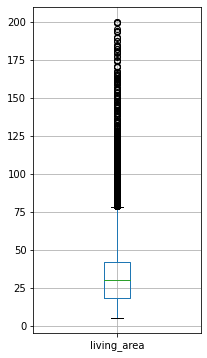

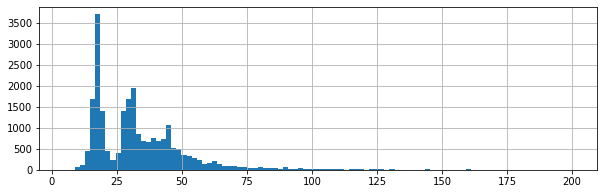

In [98]:
numeric_col('living_area')

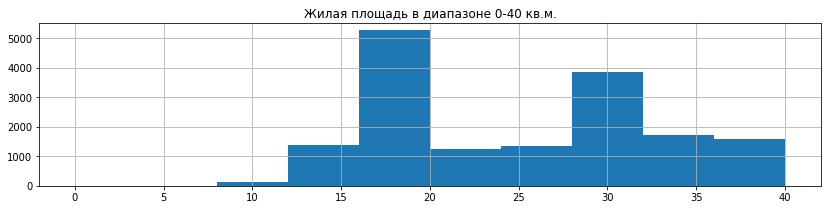

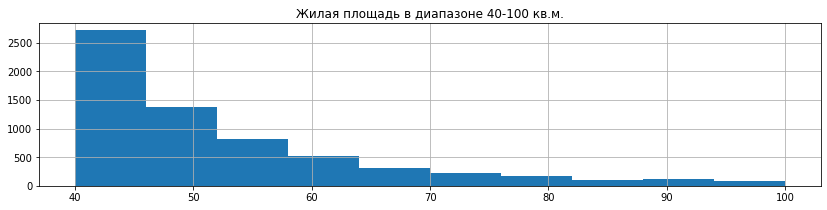

In [99]:
data['living_area'].hist(range=(0,40),figsize=(14,3), bins=10)
plt.title('Жилая площадь в диапазоне 0-40 кв.м.')
plt.show()
data['living_area'].hist(range=(40,100),figsize=(14,3), bins=10)
plt.title('Жилая площадь в диапазоне 40-100 кв.м.')
plt.show()

Наиболее распространены квартиры с жилой площадью 16-20 кв.м, дальше 29-32 кв.м и 40-45 кв.м. Количество квартир с увеличением жилой площади уменьшается, как в случае с общей площадью.
Данные распределены неравномерно.

**Площадь кухни**

Количество пропусков 0
0    25.0
1    11.0
2     8.3
3     9.5
4    41.0
Name: kitchen_area, dtype: float64 count    23002.000000
mean        10.302128
std          5.040185
min          3.000000
25%          7.300000
50%          9.085000
75%         11.400000
max         60.000000
Name: kitchen_area, dtype: float64 6.00     1281
10.00    1240
8.00     1097
9.00     1072
7.00     1049
         ... 
6.84        1
11.84       1
15.09       1
16.26       1
9.31        1
Name: kitchen_area, Length: 918, dtype: int64


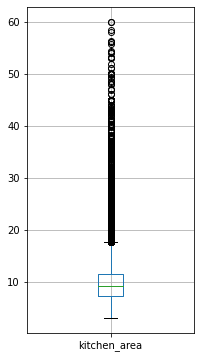

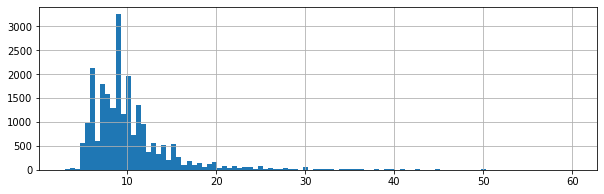

In [100]:
numeric_col('kitchen_area')

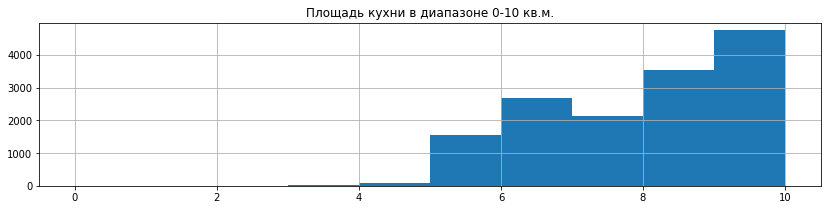

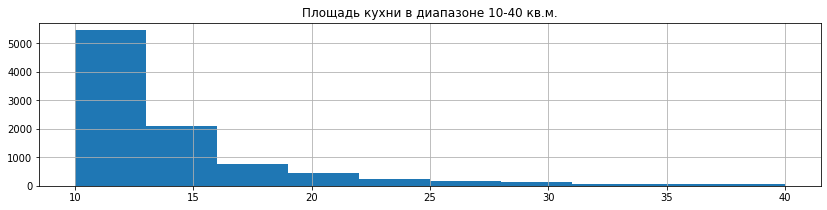

In [101]:
data['kitchen_area'].hist(range=(0,10),figsize=(14,3), bins=10)
plt.title('Площадь кухни в диапазоне 0-10 кв.м.')
plt.show()
data['kitchen_area'].hist(range=(10,40),figsize=(14,3), bins=10)
plt.title('Площадь кухни в диапазоне 10-40 кв.м.')
plt.show()

Наиболее распространенный размер кухни - 10-12 кв.м. В обе стороны от этого размера количество вариантов плавно уменьшается.

##### Цена объекта

Количество пропусков 0
0    13000.0
1     3350.0
2     5196.0
3    64900.0
4    10000.0
Name: last_price, dtype: float64 count    23002.000000
mean      6124.662516
std       5951.529255
min        520.000000
25%       3400.000000
50%       4600.000000
75%       6700.000000
max      99000.000000
Name: last_price, dtype: float64 4500.0     339
3500.0     282
4000.0     258
4300.0     257
3600.0     254
          ... 
4245.0       1
8170.0       1
5098.0       1
74000.0      1
6725.0       1
Name: last_price, Length: 2776, dtype: int64


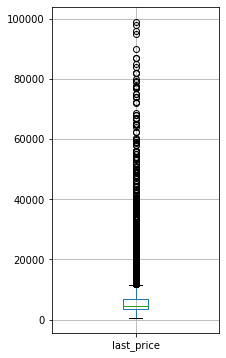

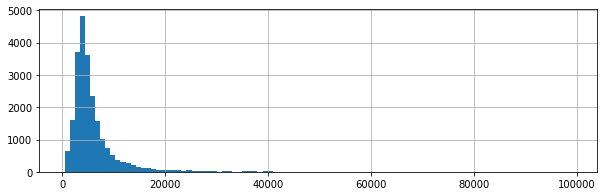

In [102]:
numeric_col('last_price')

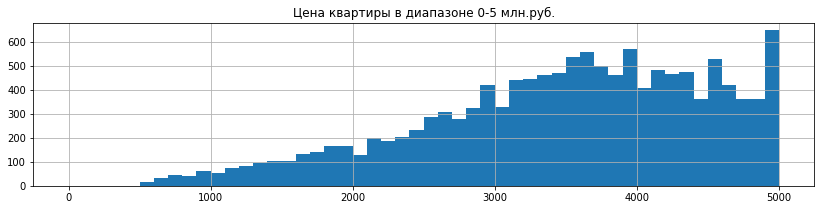

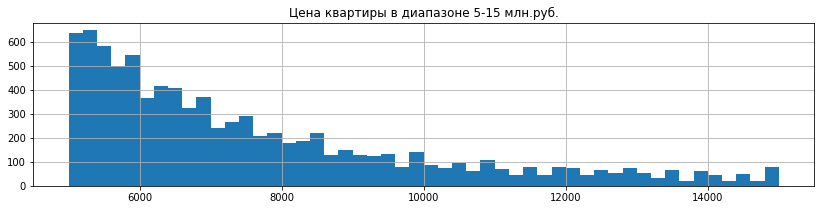

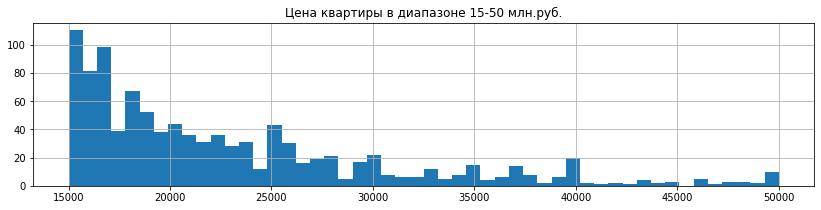

In [103]:
data['last_price'].hist(range=(0,5000),figsize=(14,3), bins=50)
plt.title('Цена квартиры в диапазоне 0-5 млн.руб.')
plt.show()
data['last_price'].hist(range=(5000,15000),figsize=(14,3), bins=50)
plt.title('Цена квартиры в диапазоне 5-15 млн.руб.')
plt.show()
data['last_price'].hist(range=(15000,50000),figsize=(14,3), bins=50)
plt.title('Цена квартиры в диапазоне 15-50 млн.руб.')
plt.show()

Больше всего квартир в диапазоне от 3.5 до 6 млн. руб. Начиная с 6 миллионов количество предложений плавно уменьшается. Так же происходит с предложениями ниже 3.5 миллионов.

##### Количество комнат

Количество пропусков 0
0    3
1    1
2    2
3    3
4    2
Name: rooms, dtype: int64 count    23002.000000
mean         2.059821
std          1.024412
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64 1     8072
2     7737
3     5629
4     1121
5      290
6       93
7       42
8        8
9        5
10       3
11       2
Name: rooms, dtype: int64


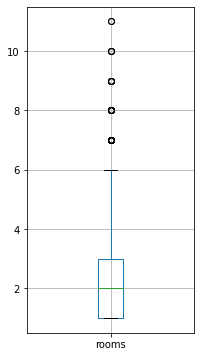

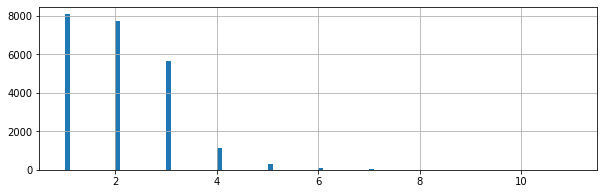

In [104]:
numeric_col('rooms')

Наиболее распространены однокомнатные и двухкомнатные квартиры. Трехкомнатных меньше примерно на 35%, остальных вариантов уже заметно меньше. Начиная с 8-ми комнат уже совсем единичные варианты.

##### Высота потолков

Количество пропусков 0
0    2.70
1    2.65
2    2.65
3    2.65
4    3.03
Name: ceiling_height, dtype: float64 count    23002.000000
mean         2.694590
std          0.224688
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64 2.65    9546
2.50    3462
2.60    1624
2.70    1544
3.00    1062
        ... 
3.48       1
5.00       1
5.50       1
3.93       1
4.15       1
Name: ceiling_height, Length: 163, dtype: int64


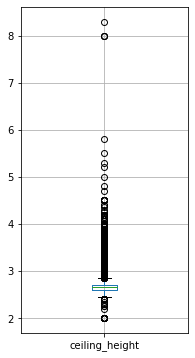

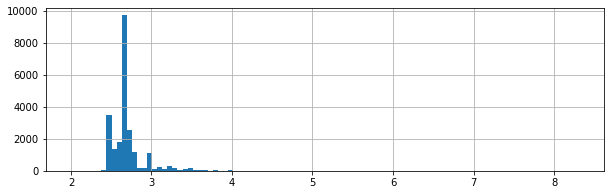

In [105]:
numeric_col('ceiling_height')

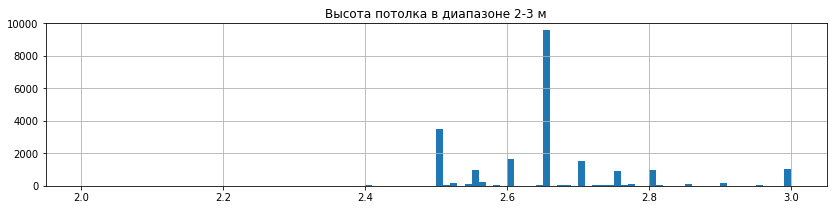

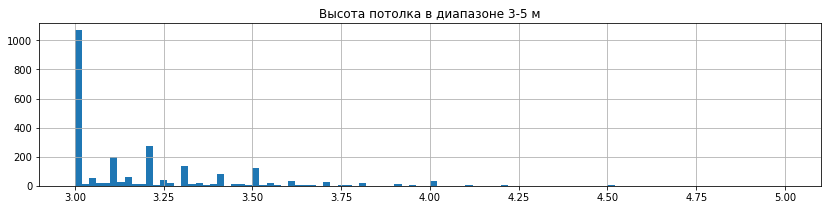

In [106]:
data['ceiling_height'].hist(range=(2,3),figsize=(14,3), bins=100)
plt.title('Высота потолка в диапазоне 2-3 м')
plt.show()
data['ceiling_height'].hist(range=(3,5),figsize=(14,3), bins=100)
plt.title('Высота потолка в диапазоне 3-5 м')
plt.show()

Самая распространенная высота потолка - 2,65 м, всех остальных вариантов сильно меньше. Например, по второй по популярности высоте потолка - 2,5 м, предложений почти в 3 раза меньше.

##### Этаж квартиры, тип этажа, общее количество этажей в доме

**Этаж квартиры**

Количество пропусков 0
0     8
1     1
2     4
3     9
4    13
Name: floor, dtype: int64 count    23002.000000
mean         5.892879
std          4.873853
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64 2     3258
3     2986
1     2825
4     2712
5     2552
6     1267
7     1181
8     1060
9     1027
10     669
12     511
11     510
13     369
15     334
14     327
16     310
17     223
18     171
19     142
21     116
22     109
20     106
23      96
24      59
25      42
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64


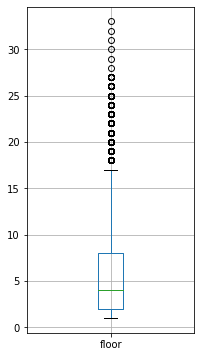

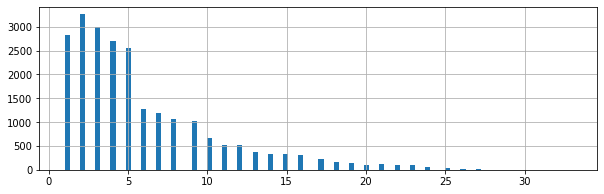

In [107]:
numeric_col('floor')

Больше всего квартир продается на 1 - 5 этажах, уже с 6-го этажа количество предложений в 2 раза меньше. Начиная с 6-го этажа, количество предложений плавно уменьшается. Вероятно это связано с этажностью домов, проверим эту теорию позже.

**Тип этажа**

In [108]:
display(data['floor_type'].value_counts())
data['floor_type'].describe()

другой       16954
последний     3246
первый        2802
Name: floor_type, dtype: int64

count      23002
unique         3
top       другой
freq       16954
Name: floor_type, dtype: object

Очевидно что больше всего квартир будет в категории "другой", так как в ней находятся все значение не первого и не последнего этажа. Квартир на последнем этажа продается больше чем на первом примерно на 15%

**Общее количество этажей**

Количество пропусков 0
0    16
1    11
2     5
3    14
4    14
Name: floors_total, dtype: int64 count    23002.000000
mean        10.708591
std          6.596488
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64 5     5639
9     3698
16    1357
12    1345
4     1154
10    1143
25    1059
6      863
17     822
3      637
7      562
14     542
18     501
24     453
8      368
2      363
15     358
23     336
19     331
22     280
20     265
13     220
11     196
27     162
21     150
26     123
35      24
1       23
28      20
36       3
34       1
60       1
52       1
29       1
33       1
Name: floors_total, dtype: int64


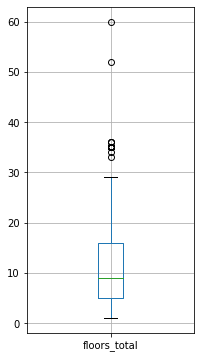

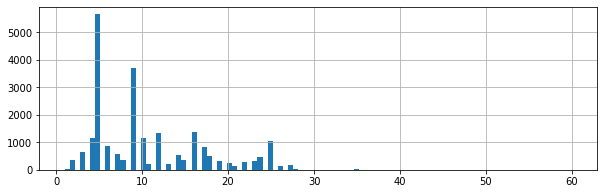

In [109]:
numeric_col('floors_total')

Самые распространенные - пятиэтажные дома. Это объясняет почему большинство квартир находится в диапазоне 1-5 этажей. Следующие по популярности девятиэтажные дома, но их уже на 35% меньше. Остальных вариантов сильно меньше. Данные распределены неравномерно.

##### Расстояние до центра города, ближайшейго аэропорта и парка

**Расстояние до центра города**

Количество пропусков 5312
0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: city_centers_nearest, dtype: float64 count    17690.000000
mean        14.257151
std          8.584159
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_nearest, dtype: float64 12.0    1636
15.0    1542
13.0    1436
14.0    1257
16.0    1251
        ... 
63.0       1
61.0       1
45.0       1
62.0       1
65.0       1
Name: city_centers_nearest, Length: 61, dtype: int64


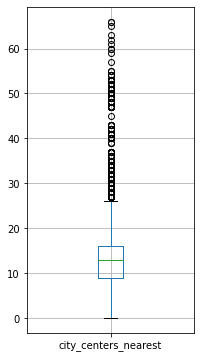

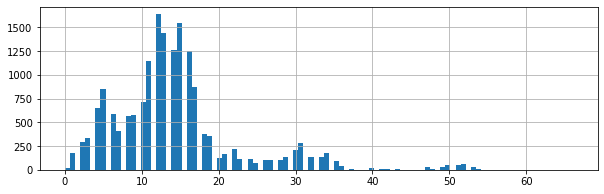

In [110]:
numeric_col('city_centers_nearest')

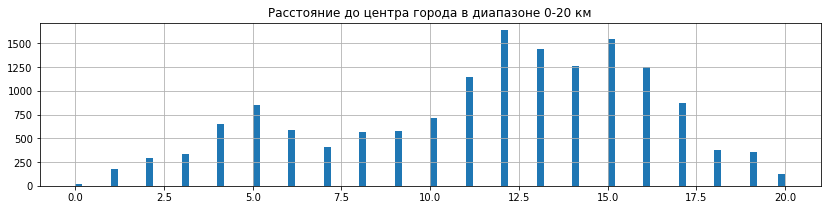

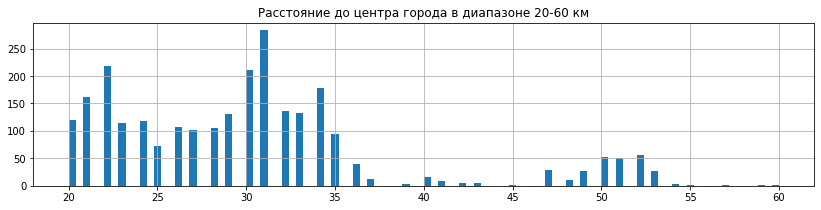

In [111]:
data['city_centers_nearest'].hist(range=(0,20),figsize=(14,3), bins=100)
plt.title('Расстояние до центра города в диапазоне 0-20 км')
plt.show()
data['city_centers_nearest'].hist(range=(20,60),figsize=(14,3), bins=100)
plt.title('Расстояние до центра города в диапазоне 20-60 км')
plt.show()

Больше всего квартир находятся в радиусе 12-15 километров. Вне этого радиуса ближе к центру квартир больше, чем квартир, расположенных дальше 15 км от центра города.

**Расстояние до ближайшего аэропорта**

Количество пропусков 5312
0    18863.0
1    12817.0
2    21741.0
3    28098.0
4    31856.0
Name: airports_nearest, dtype: float64 count    17690.000000
mean     28821.105681
std      12648.002028
min       6450.000000
25%      18539.000000
50%      26785.000000
75%      37271.750000
max      84853.000000
Name: airports_nearest, dtype: float64 26785.0    80
37434.0    54
21928.0    31
44870.0    29
37407.0    27
           ..
39751.0     1
24283.0     1
33233.0     1
15600.0     1
20875.0     1
Name: airports_nearest, Length: 8155, dtype: int64


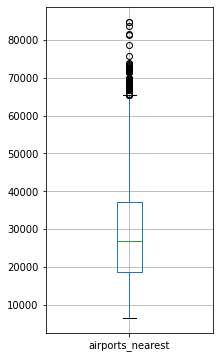

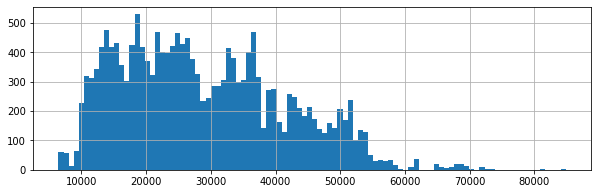

In [112]:
numeric_col('airports_nearest')

Данные равномерно распределены в диапазоне от 11 до 37 км. Предложений вне этого диапазона сильно меньше.

Количество пропусков 5858
0    482.0
1      NaN
2     90.0
3     84.0
4    112.0
Name: parks_nearest, dtype: float64 count    17144.000000
mean       475.964069
std        231.937702
min          1.000000
25%        434.000000
50%        461.000000
75%        461.000000
max       3190.000000
Name: parks_nearest, dtype: float64 461.0    8229
733.0     320
393.0     215
398.0     173
367.0     133
         ... 
794.0       1
133.0       1
861.0       1
726.0       1
929.0       1
Name: parks_nearest, Length: 992, dtype: int64


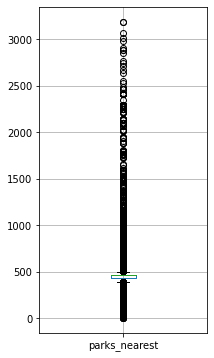

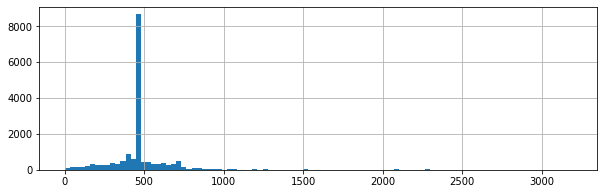

In [113]:
numeric_col('parks_nearest')

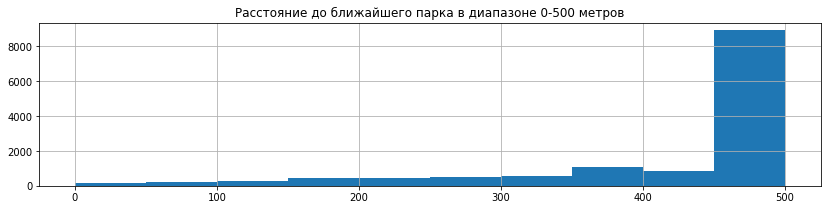

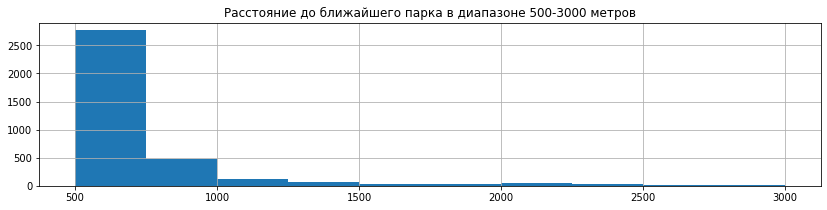

In [114]:
data['parks_nearest'].hist(range=(0,500),figsize=(14,3), bins=10)
plt.title('Расстояние до ближайшего парка в диапазоне 0-500 метров')
plt.show()
data['parks_nearest'].hist(range=(500,3000),figsize=(14,3), bins=10)
plt.title('Расстояние до ближайшего парка в диапазоне 500-3000 метров')
plt.show()

В большинстве случаем ближайший парк находится в пределах 500 метров. На большем отдалении количество заметно сокращается.

##### День и месяц публикации объявления

**День публикации**

Количество пропусков 0
0    3
1    1
2    3
3    4
4    1
Name: weekday, dtype: int64 count    23002.000000
mean         2.570733
std          1.789027
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64 3    4165
1    4044
4    3910
2    3849
0    3512
5    1877
6    1645
Name: weekday, dtype: int64


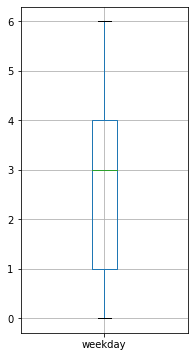

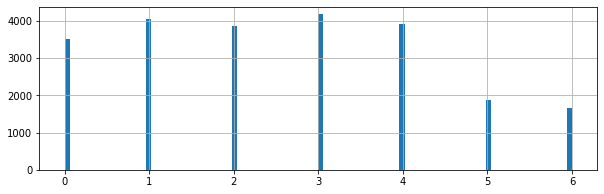

In [115]:
numeric_col('weekday')

В будние дни распределение достаточно равномерное, в выходные размещают объявления примерно в 2 раза реже.

Количество пропусков 0
0     3
1    12
2     8
3     7
4     6
Name: month_exp, dtype: int64 count    23002.000000
mean         6.404834
std          3.488279
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exp, dtype: float64 2     2577
3     2487
11    2319
4     2302
10    2074
9     1929
6     1717
8     1708
7     1644
12    1568
1     1446
5     1231
Name: month_exp, dtype: int64


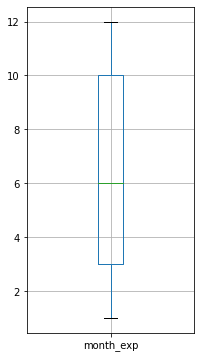

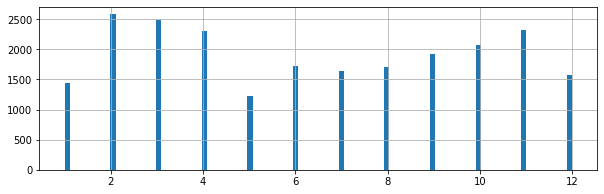

In [116]:
numeric_col('month_exp')

Больше всего размещений с февраля по апрель, а в январе и мае наоборот размещений меньше всего. Скорее всего это связано с большим количеством праздничных дней.

#### Скорость продажи квартир

Количество пропусков 0
0     91
1     81
2    558
3    424
4    121
Name: days_exposition, dtype: int64 count    23002.000000
mean       152.777889
std        166.226636
min          1.000000
25%         45.000000
50%         91.000000
75%        189.000000
max        898.000000
Name: days_exposition, dtype: float64 91     2127
45      918
60      538
7       236
90      209
       ... 
681       1
723       1
739       1
755       1
789       1
Name: days_exposition, Length: 865, dtype: int64


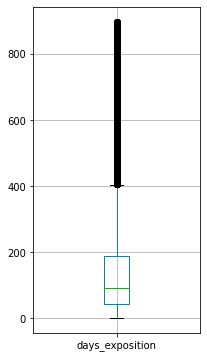

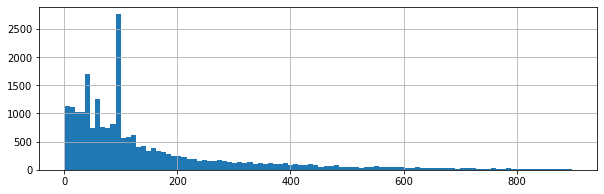

In [117]:
numeric_col('days_exposition')

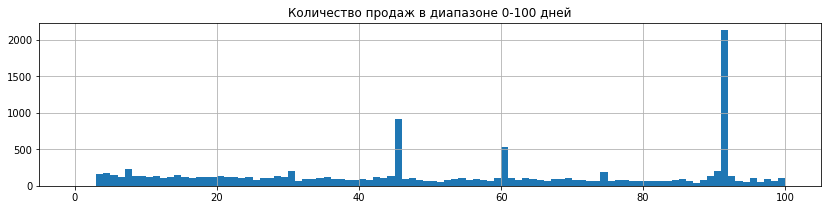

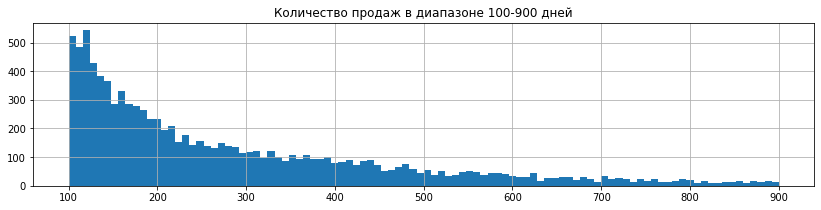

In [118]:
data['days_exposition'].hist(range=(0,100),figsize=(14,3), bins=100)
plt.title('Количество продаж в диапазоне 0-100 дней')
plt.show()
data['days_exposition'].hist(range=(100,900),figsize=(14,3), bins=100)
plt.title('Количество продаж в диапазоне 100-900 дней')
plt.show()

Чаще всего квартиры продаются за 90 дней, средний срок продажи 153 дня. Есть пик на 45-ти днях, быстрее получается продать кратно реже. Поэтому все что быстрее 45 дней можно считать быстрыми продажами. Начиная примерно со 130-140 дней количетсво сделок плавно именьшается. С 500 дня количество сделок в день меньше 100 штук, по-моему все что дольше, можно считать необычно долгими продажами.

Есть пики на 45, 60 и 91 днях продажи. Пик на 91 вероятно появился в результате заполнения пропусков. По поводу 45 и 60 дней, к сожалению, догадок нет.

#### Влияние факторов на общую стоимость объекта

<AxesSubplot:>

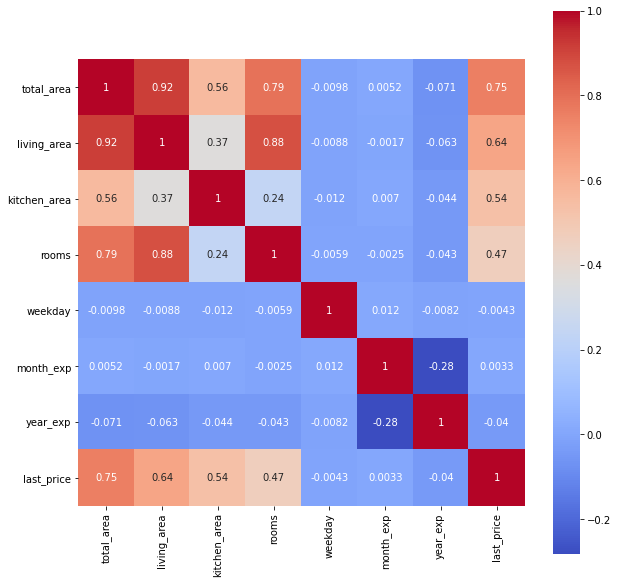

In [119]:
data_corr = data.loc[:,[
    'total_area','living_area','kitchen_area', 'rooms', 'weekday', 'month_exp', 'year_exp', 'last_price']]
fig, ax = plt.subplots(figsize=(10,10))        
sns.heatmap(data_corr.corr(), annot=True, cmap='coolwarm', square=True, ax=ax)

На матрице корреляции видно что есть прямая зависимость цены от 4 показателей: общая и жилая площадь, площадь кухни и количество комнат. Зависимости от даты размещения (дня недели, месяца и года) почти нет.

**Общая площадь**

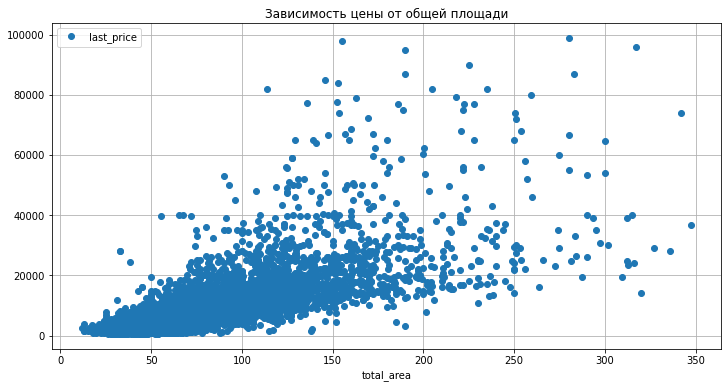

In [120]:
data.plot(x='total_area', y='last_price', style='o', grid=True, figsize=(12,6))
plt.title("Зависимость цены от общей площади")
plt.show()

Примерно до 150 кв.м. наблюдается прямая зависимость стоимости объекта от общей площади. Свыше 150 кв.м. сильный разброс, зависимость не наблюдается.

**Жилая площадь**

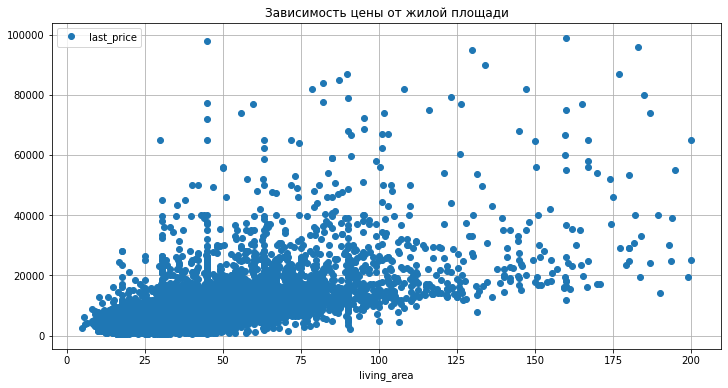

In [121]:
data.plot(y='last_price', x='living_area', style='o', grid=True, figsize=(12,6))
plt.title("Зависимость цены от жилой площади")
plt.show()

Есть зависимость примерно до 100 кв.м., дальше предложений становится меньше и увеличивается разброс. Так же и в диапазоне 10-100 есть выбивающиеся значения. Коэффициент корреляции 0,64. На цену могут влиять и другие факторы. Например, ремонт или планировка.

**Площадь кухни**

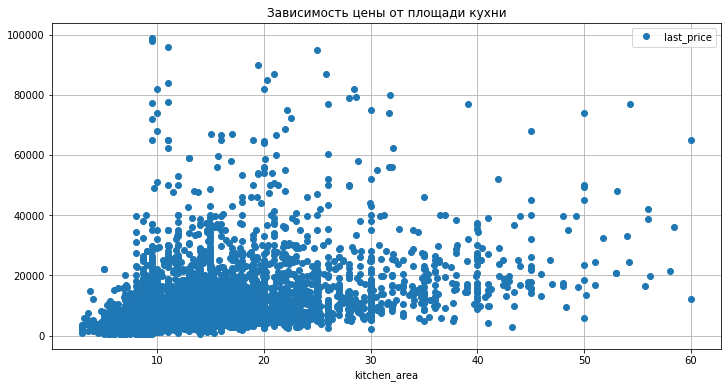

In [122]:
data.plot(y='last_price', x='kitchen_area', style='o', grid=True, figsize=(12,6))
plt.title("Зависимость цены от площади кухни")
plt.show()

Здесь зависимость наблюдается примерно до 30-40 кв.м., дальше меньше предложений с бОльшим разбросом. Так же и в диапазоне 10-40 есть выбивающиеся значения. Все же коэффициент корреляции не единица. На цену могут влиять и другие факторы, даже в рамках самой кухни. Например, ремонт, наличие той или иной техники.

**Количество комнат**

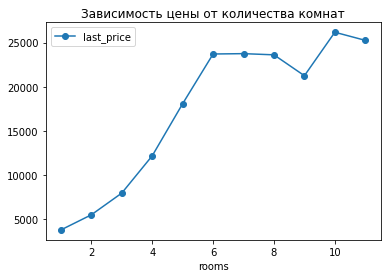

In [123]:
rooms_pivot = data.pivot_table(index='rooms', values='last_price').plot(style='-o')
plt.title('Зависимость цены от количества комнат')
plt.show()

До 6 комнат есть прямое влиянеие на стоимость квартиры. С большим количеством комнат предложений меньше, на них влияют другие факторы.

**Тип этажа квартиры**

In [124]:
floor_type_pivot = data.pivot_table(
    index='floor_type', values='last_price', aggfunc=('mean','median','count'))
print(floor_type_pivot)

            count         mean  median
floor_type                            
другой      16954  6357.993839  4800.0
первый       2802  4700.755526  3900.0
последний    3246  6135.102489  4300.0


Всреднем самые дешевые из трех категорий квартиры на первом этаже. На последнем этаже немного дешевле, чем на всех остальных, кроме первого.

**Дата размещения объявления**

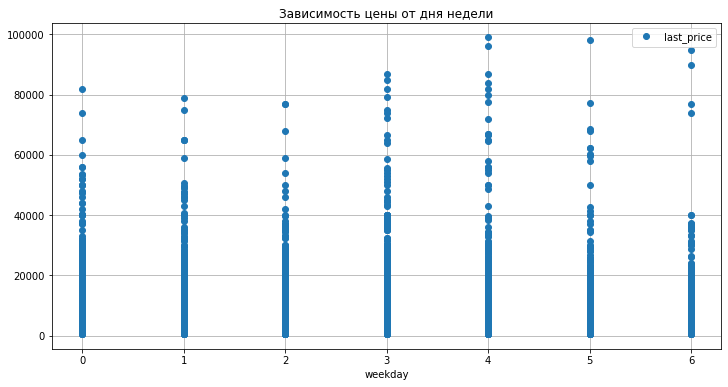

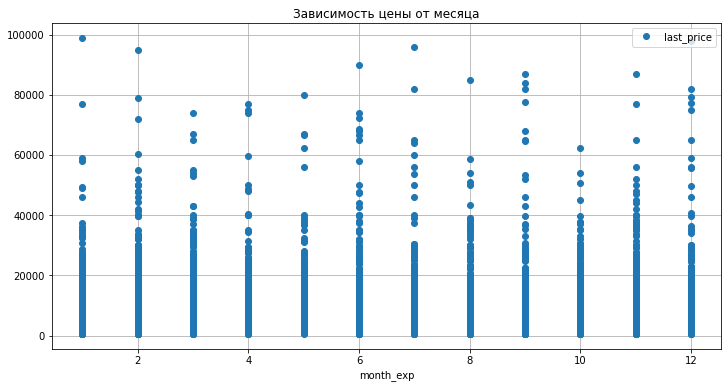

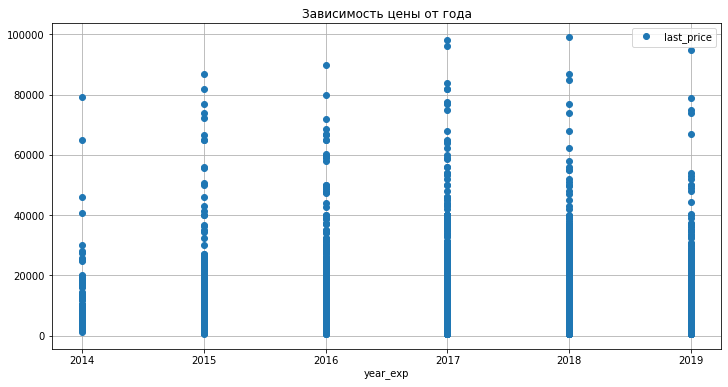

In [125]:
data.plot(
    y='last_price', x='weekday', style='o', grid=True, figsize=(12,6))
plt.title('Зависимость цены от дня недели')
plt.show()

data.plot(
    y='last_price', x='month_exp', style='o', grid=True, figsize=(12,6))
plt.title('Зависимость цены от месяца')
plt.show()

data.plot(
    y='last_price', x='year_exp', style='o', grid=True, figsize=(12,6))
plt.title('Зависимость цены от года')
plt.show()

**Зависимость от дня недели**: до 4-х миллионов разницы почти нет, более дорогие варианты чаще размещают в четверг и в пятницу.

**Зависимость от месяца**: явной зависимости нет, более дорогие варианты чаще размещают в феврале, июне, сентябре и декабре.

**Зависимость от года**: средняя стоимость квартир росла с 2014 по 2017 год. С 2017 по 2019 наблюдается снижение средней цены.

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [126]:
locality_price_pivot = data.pivot_table(
    index='locality_name', values='sqm_price', aggfunc=('count','mean'))

locality_price_pivot = locality_price_pivot.sort_values('count', ascending=False).reset_index()

max_sqm_price = locality_price_pivot[
    locality_price_pivot['mean'] == locality_price_pivot['mean'].max()]
print('Самая высока цена за 1 кв.м:',max_sqm_price.loc[:,('locality_name', 'mean')])

min_sqm_price = locality_price_pivot[
    locality_price_pivot['mean'] == locality_price_pivot['mean'].min()]
print('Самая низкая цена за 1 кв.м:',min_sqm_price.loc[:,('locality_name', 'mean')])

locality_price_pivot.loc[:10,:]


Самая высока цена за 1 кв.м:    locality_name        mean
48   Зеленогорск  115.121667
Самая низкая цена за 1 кв.м:     locality_name   mean
262     Совхозный  12.56


,locality_name,count,mean
0,Санкт-Петербург,15256,113.314097
1,Мурино,576,86.190972
2,Кудрово,461,95.337918
3,Шушары,435,78.488759
4,Всеволожск,391,68.709821
5,Пушкин,353,102.918810
6,Колпино,335,75.355164
7,Парголово,323,90.145046
8,Гатчина,302,68.954007
9,Выборг,235,58.250426


Топ-1 по количеству объявлений с большим отрывом занимает Санкт-Петербург - 15256 объявлений, второй по списку населенный пункт Мурино. Там уже всего 576 объявлений. Из всего списка самая высокая средняя цена за кв.м. в Зеленогорске - 115.12 тыс.руб/кв.м, самая низкая в Совхозном - 12.56, но там всего одно объявление.

#### Выделите квартиры в Санкт-Петербурге и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

city_centers_nearest
0.0     20771.772727
1.0     15855.646403
2.0     14679.275189
3.0     10730.249554
4.0     11211.409232
5.0     12327.075133
6.0     12835.458764
7.0     13600.817603
8.0      8986.943012
9.0      6965.847200
10.0     6495.840900
11.0     6187.467934
12.0     6083.267432
13.0     6071.434130
14.0     5609.690134
15.0     5814.347719
16.0     5386.255122
17.0     5219.652865
18.0     5092.428035
19.0     5036.738333
20.0     5990.037021
21.0     5492.531148
22.0     5417.591567
23.0     4994.130952
24.0     3854.429615
25.0     4052.839923
26.0     4014.287047
27.0     8300.000000
28.0     5026.428571
29.0     4210.000000
Name: last_price, dtype: float64

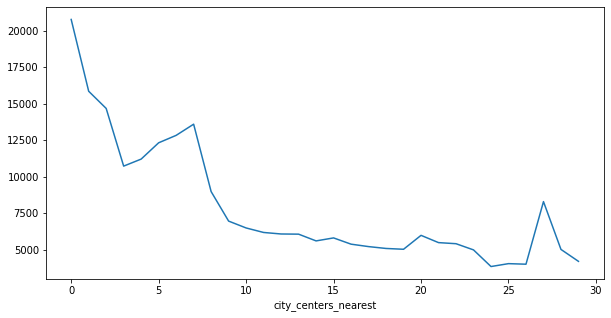

In [127]:
spb_data = data.query('locality_name == "Санкт-Петербург"')
spb_data = spb_data.loc[:,['last_price', 'city_centers_nearest']]
spb_data = spb_data.groupby('city_centers_nearest')['last_price'].mean()
spb_data.plot(figsize=(10,5))
spb_data

В целом все логично: чем дальше от центра города, тем ниже средняя стоимость одного квадратного метра. За исключением двух пиков 4-7 км и 27-28 км.

Сложно сказать, зависит от площади города. Условный радиус центра в Питере сильно отличается от такого же радиуса, например, в Пушкине. Предполагаю что в нашем случае 4-7 километров может быть эта самая граница центра.

### Общий вывод

    В результате предобработки было удалено 696 строк с пропусками в тех или иных значениях. У столбцов 'floors_total', 'parks_around3000', 'ponds_around3000', 'days_exposition' и 'balcony' тип данных изменен на integer, так как данные в этих столбцах могут быть только целочисленные. Тип данных 'first_day_exposition' изменен на datetime, так как в нем записана дата размещения объявления, в столбце is_apartment тип изменен на bool.
    
    Далее добавили в таблицу столбцы с ценой одного квадратного метра, днем недели, месяцем и годом публикации объявления, добавили типы этажа квартиры (первый, последний, другой). Эти столбцы были использованы в анализе.
    
    В результате анализа были сделаны следующие выводы:
    1. Больше всего квартир с площадями 30-46 кв.м - это, похоже, самые популярные 1 и 2-х комнатные.
    2. Наиболее распространены квартиры с жилой площадью 16-20 кв.м, дальше 29-32 кв.м и 40-45 кв.м. Количество квартир с увеличением жилой площади уменьшается, как в случае с общей площадью.
    3. Наиболее распространенный размер кухни - 10-12 кв.м. В обе стороны от этого размера количество вариантов плавно уменьшается.
    4. Больше всего квартир в диапазоне от 3.5 до 6 млн. руб. Начиная с 6 миллионов количество предложений плавно уменьшается. Так же происходит с предложениями ниже 3.5 миллионов.
    5. Наиболее распространены однокомнатные и двухкомнатные квартиры. Трехкомнатных меньше примерно на 35%, остальных вариантов уже заметно меньше. Начиная с 8-ми комнат уже совсем единичные варианты.
    6. Самая распространенная высота потолка - 2,65 м, всех остальных вариантов сильно меньше. Например, по второй по популярности высоте потолка - 2,5 м, предложений почти в 3 раза меньше.
    7. Больше всего квартир продается на 1 - 5 этажах, уже с 6-го этажа количество предложений в 2 раза меньше. Начиная с 6-го этажа, количество предложений плавно уменьшается. Это связано с тем, что самые распространенные - пятиэтажные дома. Следующие по популярности девятиэтажные дома, но их уже на 35% меньше.
    8. Квартир на последнем этажа продается больше, чем на первом примерно на 15%
    9. Больше всего квартир находятся в радиусе 12-15 километров. Вне этого радиуса ближе к центру квартир больше, чем квартир, расположенных дальше 15 км от центра города.
    10. Больше всего размещений с февраля по апрель, а в январе и мае наоборот размещений меньше всего. Скорее всего это связано с большим количеством праздничных дней. Так же относительно дней недели, в будни объявлений больше, чем в выходные.
    11. Чаще всего квартиры продаются за 90 дней, средний срок продажи 153 дня. Есть пик на 45-ти днях, быстрее получается продать кратно реже. Поэтому все что быстрее 45 дней можно считать быстрыми продажами. Начиная примерно со 130-140 дней количетсво сделок плавно именьшается. С 500 дня количество сделок в день меньше 100 штук, все что дольше, можно считать необычно долгими продажами.
    
    Так же были выявлены следующие закономерности:
    1. Из рассмотренных показателей на цену больше всего влияет общая плоащдь квартиры, затем жилая площадь, площадь кухни и количество комнат. День недели, месяц и год размещения почти не оказывают никакого влияния на цену квартиры.
    2. Примерно до 150 кв.м. наблюдается прямая зависимость стоимости объекта от общей площади. Свыше 150 кв.м. сильный разброс.
    3. Есть зависимость примерно до 100 кв.м. жилой площади, дальше предложений становится меньше и увеличивается разброс. Так же и в диапазоне 10-100 есть выбивающиеся значения. На цену могут влиять и другие факторы. Например, ремонт или планировка.
    4. Зависимость от площади кухни наблюдается примерно до 30-40 кв.м., дальше меньше предложений с бОльшим разбросом. Так же и в диапазоне 10-40 есть выбивающиеся значения. На цену могут влиять и другие факторы, даже в рамках самой кухни. Например, ремонт, наличие той или иной техники.
    5. До 6 комнат есть прямое влиянеие на стоимость квартиры. На квартиры с количеством комнта больше 6, вероятно, влияют другие факторы.
    6. Всреднем самые дешевые из трех категорий квартиры на первом этаже. На последнем этаже немного дешевле, чем на всех остальных, кроме первого.
    7. В зависимость от дня недели, до 4-х миллионов разницы почти нет, более дорогие варианты чаще размещают в четверг и в пятницу. В зависимость от месяца явной корреляции нет, более дорогие варианты чаще размещают в феврале, июне, сентябре и декабре. По году размещения: средняя стоимость квартир росла с 2014 по 2017 год. С 2017 по 2019 наблюдается снижение средней цены.
    8. Самая высокая цена за кв.м. в Зеленогорске - 115,12 тыс.руб., самая низкая в Совхозном - 12,56 тыс.руб.
    9. Топ-1 по количеству объявлений с большим отрывом занимает Санкт-Петербург - 15256 объявлений, второй по списку населенный пункт Мурино (576 объявлений), в конце списка ТОП-10 - Петергоф (всего 194 объявления) 
    10. Чем дальше от центра города, тем ниже средняя стоимость одного квадратного метра. За исключением двух пиков 4-7 км и 27-28 км.